In [2]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
from mord import LogisticAT
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
import numpy as np
import category_encoders as ce
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from collections import Counter
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, RandomizedSearchCV
import math
import scipy.stats as stats
from matplotlib.colors import LogNorm
from sklearn.linear_model import LinearRegression
import plot_analysis
from sklearn.tree import DecisionTreeRegressor
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_PATH = r'../data'

In [4]:
df1718 = pd.read_csv(os.path.join(DATA_PATH,'for_the_model_2017_2018.csv'))
df1617 = pd.read_csv(os.path.join(DATA_PATH,'for_the_model_2016_2017.csv'))
df1819 = pd.read_csv(os.path.join(DATA_PATH,'for_the_model_2018_2019.csv'))
frames = [df1617, df1718, df1819]

df = pd.concat(frames)

In [5]:
df.reset_index(inplace=True, drop=True)

In [6]:
df

,match_id,match_day,team_id,player_id,minutes_played,red_card,yellow_card,goals,total_passes,completed_passes,...,match_day_fanta,player_name_fantacalcio,player_role_fantacalcio,fantacalcio_score,ratings,ratings_3,ratings_5,ratings_7,ratings_9,ratings_total_alpha
0,2214665,38,3171,15280,74,0,0,0,34,30,...,38,JAJALO,C,5.5,0.003892,0.014842,0.033946,0.075712,0.230823,0.369009
1,2214665,38,3171,20694,82,0,1,0,39,32,...,38,DIAMANTI,C,6.0,0.004090,0.015600,0.035679,0.079577,0.242606,0.380596
2,2214665,38,3171,99661,90,0,0,0,31,26,...,38,CIONEK,D,6.5,0.003606,0.013751,0.031451,0.070149,0.213861,0.352330
3,2214665,38,3171,246059,90,0,0,0,28,22,...,38,GOLDANIGA,D,6.5,0.003333,0.012712,0.029073,0.064845,0.197691,0.336430
4,2214665,38,3171,125286,90,0,0,0,33,28,...,38,GONZALEZ G,D,5.5,0.002183,0.008326,0.019042,0.042471,0.129480,0.269356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24139,2759433,1,3159,7849,90,0,0,0,21,20,...,1,SZCZESNY,P,6.0,NaN,NaN,NaN,NaN,NaN,NaN
24140,2759433,1,3159,135903,90,0,0,0,60,55,...,1,CANCELO,D,5.5,0.004761,0.018118,0.041282,0.091321,0.279610,0.523608
24141,2759433,1,3159,246061,34,0,0,1,10,10,...,1,BERNARDESCHI,C,7.0,0.253998,0.265215,0.284668,0.326689,0.484809,0.547821
24142,2759433,1,3159,14943,26,0,0,0,3,2,...,1,MANDZUKIC,A,6.0,0.003671,0.013972,0.031835,0.070424,0.215625,0.461107


In [7]:
listMarks = ['gazzetta_score', 'tuttosport_score', 'corriere_score', 'fantacalcio_score']
#'gazzetta_score', 'tuttosport_score', 'corriere_score', 
onlyFaGazz = ['fantacalcio_score']
listRoles = ['C', 'A', 'D', 'P']
toRemoveRatings = ['ratings', 'ratings_3', 'ratings_5', 'ratings_7', 'ratings_9', 'ratings_total_alpha']
toRemoveWithoutContextual = ['big_match', 'winner', 'contextual_h/a', 'contextual_team_goal', 'contextual_goal_suffered', 
                            'contextual_goal_difference', 'contextual_club_name', 'contextual_against_club_name', 'contextual_age',
                            'contextual_expecatition']
toRemove = ['match_id', 'match_day', 'team_id', 'player_name_fantacalcio', 'player_role_fantacalcio',
           'player_role_newspaper', 'player_name_newspaper', 'corriere_score', 'tuttosport_score', 'fantacalcio_score','gazzetta_score', 'team',
           'match_day_newspaper', 'match_day_fanta', 'player_id']
ratings = ['ratings', 'ratings_3', 'ratings_5', 'ratings_7', 'ratings_9', 'ratings_total_alpha']

In [8]:
def mae_fun(target_true, target_fit):
    target_true = le.inverse_transform(target_true)
    target_fit = le.inverse_transform(target_fit)
    froDistTrue.append(target_true)
    froDistFit.append(target_fit)
    return mean_absolute_error(target_true, target_fit)
    
def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

def ks_fun(target_true, target_fit):
    target_true = le.inverse_transform(target_true)
    target_fit = np.round(target_fit, 0)
    target_fit = target_fit.astype('int')
    target_fit = le.inverse_transform(target_fit)
    ks = ks_2samp(target_true, target_fit)[0]
    return round(ks,2)

def r2_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return r2_score(target_true, target_fit)

def pearsonr_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return pearsonr(target_true, target_fit)[0]

progress = 0
resultPerRole = {}
distributionPerNewspaper = {}
#for each newspaper 
for newspaper in listMarks:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    #for each role
    for role in listRoles:
        progress += 1
        if(newspaper != 'fantacalcio_score'):
            subDF = df[df['player_role_newspaper'] == role]
        else:
            subDF = df[df['player_role_fantacalcio'] == role]
        #extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        subDF['contextual_against_club_name'] = le_teams.fit_transform(subDF['contextual_against_club_name'])
        subDF['contextual_club_name'] = le_teams.transform(subDF['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        subDF['country'] = le_country.fit_transform(subDF['country'])
        
        if(newspaper == 'corriere_score'):
            subDF = subDF[subDF['corriere_score'] != 10]
        if(newspaper == 'corriere_score' and role == 'D'):
            subDF = subDF[subDF['corriere_score'] != 8]
            subDF = subDF[subDF['corriere_score'] != 3.5]
        if(newspaper == 'corriere_score' and role == 'P'):
            subDF = subDF[subDF['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        #if(newspaper == 'gazzetta_score'):
            #subDF = subDF[subDF['gazzetta_score'] != 10]
        #if(newspaper == 'gazzetta_score' and role == 'D'):
            #subDF = subDF[subDF['gazzetta_score'] != 8]
            #subDF = subDF[subDF['gazzetta_score'] != 3.5]
        #if(newspaper == 'gazzetta_score'):
            #subDF = subDF[subDF['gazzetta_score'] != 9]
        #if(newspaper == 'gazzetta_score'):
            #subDF = subDF[subDF['gazzetta_score'] != 8.5]
        
        
        #check the size of the labels
        #vc = subDF[newspaper].value_counts()
        #indexes = vc[vc < n_min].index
        #subDF.drop(indexes, inplace=True)
    
        #ectract and encode labels
        le = preprocessing.LabelEncoder()
        labels = subDF[newspaper]
        le.fit(subDF[newspaper])
        labels = le.transform(labels)
        myset = set(labels)
        
        for el in toRemove:
            del subDF[el]
            
            
        #uncomment to train without contextual variables
        #for el in toRemoveWithoutContextual:
            #del subDF[el]
            
        #uncomment to train without ratings variables
        #for el in toRemoveRatings:
            #del subDF[el]
        
        #uncommentforonly contextual variables
        subDF = subDF[toRemoveWithoutContextual]
        
        stringMatch = newspaper + '_' + role
        
        resultPerRole[stringMatch] = {}
        
        #remove player rank values for goalkeeper
        #if(role == 'P'):
        #   for rat in ratings:
        #        del subDF[rat]
        print(stringMatch)
        
        
        #rescale the robust scaler
        robust = preprocessing.RobustScaler()
        robust.fit(subDF)
        subDF = robust.transform(subDF)
        
        #declare ordinal regressor
        model_ordinal = LogisticAT()  # alpha parameter set to zero to perform no regularisation
        seed = 17
        
        #kfold definition
        kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
        features = subDF
        target = labels
        #rscore
        rscore = make_scorer(pearsonr_fun, greater_is_better=True)
        #OUR OBJECTIVE IS TO INCREASE THE R SCORE
        #define the grid search
        svr = GridSearchCV(model_ordinal,
                   scoring=rscore,
                   cv=kfold,
                   param_grid={'alpha' : [0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}, verbose=1)
        
        svr.fit(features, target)
        
        print("Best Score: {}".format(svr.best_score_))
        print("Best params: {}".format(svr.best_params_))
        
        resultPerRole[stringMatch]['r'] = svr.best_score_
        
        model_ordinal = LogisticAT(alpha = svr.best_params_['alpha'])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)
        
        print(Counter(target).keys())
        print(Counter(target).values())
        
        y_pred = cross_val_predict(model_ordinal, features, target, cv=kfold)
        
        resultPerRole[stringMatch]['RSME'] = math.sqrt(mean_squared_error(le.inverse_transform(y_pred), le.inverse_transform(target)))
        resultPerRole[stringMatch]['Accuracy'] = acc_fun(target, y_pred)
        resultPerRole[stringMatch]['KS'] = ks_fun(target, y_pred)
        resultPerRole[stringMatch]['r2'] = r2_fun(target, y_pred) 
        distributionPerNewspaper[newspaper]['true'].append(le.inverse_transform(target))
        distributionPerNewspaper[newspaper]['pred'].append(le.inverse_transform(y_pred))

gazzetta_score_C
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.4min finished


Best Score: 0.42170178307134376
Best params: {'alpha': 0}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11}
dict_keys([5, 6, 2, 4, 3, 7, 8, 1, 9, 11, 10, 0])
dict_values([2869, 1859, 193, 1677, 1200, 923, 211, 67, 48, 3, 3, 3])
gazzetta_score_A
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   36.7s finished


Best Score: 0.47425964025375156
Best params: {'alpha': 0.8}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11, 10.0: 12}
dict_keys([3, 5, 11, 4, 7, 6, 8, 12, 10, 2, 9, 1, 0])
dict_values([775, 1157, 10, 964, 562, 780, 219, 2, 5, 105, 82, 36, 1])
gazzetta_score_D
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   27.1s finished


Best Score: 0.4677729028106866
Best params: {'alpha': 0.7}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 9.0: 10}
dict_keys([5, 7, 4, 3, 2, 1, 6, 8, 10, 9, 0])
dict_values([2977, 561, 1554, 1159, 274, 126, 1647, 76, 1, 4, 1])
gazzetta_score_P
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    8.9s finished


Best Score: 0.30765292190200233
Best params: {'alpha': 0.3}
{4.0: 0, 4.5: 1, 5.0: 2, 5.5: 3, 6.0: 4, 6.5: 5, 7.0: 6, 7.5: 7, 8.0: 8, 8.5: 9, 9.0: 10}
dict_keys([6, 3, 5, 4, 2, 1, 7, 8, 0, 10, 9])
dict_values([283, 233, 450, 804, 119, 25, 58, 23, 12, 1, 2])
tuttosport_score_C
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.7min finished


Best Score: 0.44659533822301917
Best params: {'alpha': 0}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11, 9.5: 12}
dict_keys([3, 5, 6, 4, 7, 8, 2, 9, 1, 10, 11, 0, 12])
dict_values([1259, 2987, 1792, 1675, 831, 199, 170, 49, 83, 5, 2, 3, 1])
tuttosport_score_A
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   40.2s finished


Best Score: 0.48343247655015464
Best params: {'alpha': 0}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11, 10.0: 12}
dict_keys([3, 5, 9, 7, 8, 4, 6, 12, 2, 1, 0, 11, 10])
dict_values([800, 1220, 99, 547, 211, 843, 797, 3, 110, 48, 3, 11, 6])
tuttosport_score_D
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   37.2s finished


Best Score: 0.4666979693210088
Best params: {'alpha': 0.5}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 10.0: 10}
dict_keys([5, 4, 6, 3, 1, 7, 8, 2, 0, 9, 10])
dict_values([3007, 1522, 1687, 1125, 137, 590, 73, 221, 5, 12, 1])
tuttosport_score_P
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    6.2s finished


Best Score: 0.31295297870566974
Best params: {'alpha': 0}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 9.0: 10}
dict_keys([7, 5, 4, 6, 3, 2, 9, 1, 8, 10, 0])
dict_values([224, 843, 235, 439, 126, 31, 24, 19, 67, 1, 1])
corriere_score_C
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.1min finished


Best Score: 0.44386154518612575
Best params: {'alpha': 0.3}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11}
dict_keys([4, 6, 2, 5, 3, 7, 8, 9, 1, 10, 11, 0])
dict_values([1644, 1749, 181, 2981, 1116, 976, 249, 62, 78, 11, 4, 4])
corriere_score_A
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   27.4s finished


Best Score: 0.4853658209763536
Best params: {'alpha': 0.5}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11}
dict_keys([3, 6, 10, 5, 8, 4, 7, 2, 9, 1, 11, 0])
dict_values([767, 728, 11, 1180, 223, 884, 598, 130, 110, 51, 14, 2])
corriere_score_D
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   15.0s finished


Best Score: 0.47509447424478823
Best params: {'alpha': 0.6}
{3.0: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8}
dict_keys([7, 6, 5, 3, 4, 1, 2, 8, 0])
dict_values([660, 1670, 3063, 1079, 1395, 133, 256, 107, 2])
corriere_score_P
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    4.5s finished


Best Score: 0.3664818224137554
Best params: {'alpha': 1}
{4.0: 0, 4.5: 1, 5.0: 2, 5.5: 3, 6.0: 4, 6.5: 5, 7.0: 6, 7.5: 7, 8.0: 8, 8.5: 9}
dict_keys([6, 3, 5, 4, 2, 1, 7, 8, 0, 9])
dict_values([257, 228, 446, 790, 142, 26, 66, 31, 22, 1])
fantacalcio_score_C
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.3min finished


Best Score: 0.47269117983082476
Best params: {'alpha': 0}
{3.5: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10, 9.0: 11}
dict_keys([4, 5, 7, 2, 3, 6, 8, 1, 9, 10, 11, 0])
dict_values([2169, 2782, 785, 162, 991, 1955, 166, 35, 23, 6, 2, 4])
fantacalcio_score_A
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   18.6s finished


Best Score: 0.5555957228847972
Best params: {'alpha': 0}
{4.0: 0, 4.5: 1, 5.0: 2, 5.5: 3, 6.0: 4, 6.5: 5, 7.0: 6, 7.5: 7, 8.0: 8, 8.5: 9, 9.0: 10}
dict_keys([1, 2, 5, 8, 0, 3, 6, 7, 4, 10, 9])
dict_values([91, 781, 756, 54, 8, 1164, 675, 244, 960, 8, 9])
fantacalcio_score_D
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   52.9s finished


Best Score: 0.5768835145474491
Best params: {'alpha': 0}
{3.0: 0, 3.5: 1, 4.0: 2, 4.5: 3, 5.0: 4, 5.5: 5, 6.0: 6, 6.5: 7, 7.0: 8, 7.5: 9, 8.0: 10}
dict_keys([7, 5, 6, 4, 2, 3, 8, 9, 1, 10, 0])
dict_values([1880, 1780, 2526, 1115, 94, 297, 556, 46, 5, 2, 3])
fantacalcio_score_P
Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    8.8s finished


Best Score: 0.3216363708797241
Best params: {'alpha': 0}
{3.5: 0, 4.0: 1, 4.5: 2, 5.0: 3, 5.5: 4, 6.0: 5, 6.5: 6, 7.0: 7, 7.5: 8, 8.0: 9, 8.5: 10}
dict_keys([7, 4, 6, 5, 2, 3, 1, 8, 9, 0, 10])
dict_values([214, 225, 570, 832, 19, 79, 10, 47, 12, 1, 1])


In [9]:
def extractResultToDataframe(resultPerRole):
    '''
    For a dictionary composed by keys (NAMENEWSPAPER_ROLE) 
    collect into single list the respective values for RSME ACCURACY KS R2 R 
    
    Return a dataframe that summarize the performances of the model
    '''
    listExploited = []
    listMae = []
    listAccuracy = []
    listKS = []
    listr2 = []
    listr = []
    for key in resultPerRole:
        listExploited.append(key)
        listMae.append(resultPerRole[key]['RSME'])
        listAccuracy.append(resultPerRole[key]['Accuracy'])
        listKS.append(resultPerRole[key]['KS'])
        listr2.append(resultPerRole[key]['r2'])
        listr.append(resultPerRole[key]['r'])

    resultOfAnalysis = pd.DataFrame()
    resultOfAnalysis['Dataset'] = listExploited
    resultOfAnalysis['RSME'] = listMae
    resultOfAnalysis['Accuracy'] = listAccuracy
    resultOfAnalysis['KS'] = listKS
    resultOfAnalysis['r2'] = listr2
    resultOfAnalysis['r'] = listr
    return resultOfAnalysis

In [10]:
resultOfAnalysis = extractResultToDataframe(resultPerRole)

In [11]:
#MORD summary
resultOfAnalysis

,Dataset,RSME,Accuracy,KS,r2,r
0,gazzetta_score_C,0.638762,0.317138,0.15,0.168563,0.421702
1,gazzetta_score_A,0.724429,0.269902,0.18,0.213930,0.474260
2,gazzetta_score_D,0.593370,0.368854,0.14,0.203179,0.467773
3,gazzetta_score_P,0.628708,0.360199,0.18,0.075471,0.307653
4,tuttosport_score_C,0.625640,0.329947,0.15,0.192117,0.446595
5,tuttosport_score_A,0.735727,0.266922,0.18,0.224627,0.483432
6,tuttosport_score_D,0.595002,0.373270,0.12,0.204903,0.466698
7,tuttosport_score_P,0.638718,0.387562,0.16,0.083622,0.312953
8,corriere_score_C,0.642353,0.331971,0.14,0.189611,0.443862
9,corriere_score_A,0.750621,0.269051,0.18,0.225743,0.485366


In [12]:
def addAdditionalMetricsToDataframeResult(resultOfAnalysis):
    '''
    Starting from the dataframe that summarize the result of the model;
    compute more information for the model and more specific one
    '''
    listMeanRGazzetta = []
    listMeanRCorriere = []
    listMeanRTuttosport = []
    listMeanRFanta = []
    listMeanP = []
    listMeanC = []
    listMeanA = []
    listMeanD = []
    listMeanR = []
    for el in resultOfAnalysis.values:
        listMeanR.append(el[5])
        name = el[0]
        s = name.split('_')
        if(s[0] == 'gazzetta'):
            if(not math.isnan(el[5])):
                listMeanRGazzetta.append(el[5])
        if(s[0] == 'tuttosport'):
            if(not math.isnan(el[5])):
                listMeanRTuttosport.append(el[5])
        if(s[0] == 'corriere'):
            if(not math.isnan(el[5])):
                listMeanRCorriere.append(el[5])
        if(s[0] == 'fantacalcio'):
            if(not math.isnan(el[5])):
                listMeanRFanta.append(el[5])
        if(s[2] == 'C'):
            if(not math.isnan(el[5])):
                listMeanC.append(el[5])
        if(s[2] == 'A'):
            if(not math.isnan(el[5])):
                listMeanA.append(el[5])
        if(s[2] == 'D'):
            if(not math.isnan(el[5])):
                listMeanD.append(el[5])
        if(s[2] == 'P'):
            if(not math.isnan(el[5])):
                listMeanP.append(el[5])
    gazzr = np.mean(listMeanRGazzetta)
    corrr = np.mean(listMeanRCorriere)
    tuttor = np.mean(listMeanRTuttosport)
    fantar = np.mean(listMeanRFanta)
    pr = np.mean(listMeanP)
    dr = np.mean(listMeanD)
    ar = np.mean(listMeanA)
    cr = np.mean(listMeanC)
    rr = np.mean(listMeanR)

    meanR = []
    meanNewspaper = []
    meanRole = []

    for el in resultOfAnalysis.values:
        name = el[0]
        s = name.split('_')
        if(s[0] == 'gazzetta'):
            meanNewspaper.append(gazzr)
        if(s[0] == 'tuttosport'):
            meanNewspaper.append(tuttor)
        if(s[0] == 'corriere'):
            meanNewspaper.append(corrr)
        if(s[0] == 'fantacalcio'):
            meanNewspaper.append(fantar)
        if(s[2] == 'C'):
            meanRole.append(cr)
        if(s[2] == 'A'):
            meanRole.append(ar)
        if(s[2] == 'D'):
            meanRole.append(dr)
        if(s[2] == 'P'):
            meanRole.append(pr)
        meanR.append(rr)

    resultOfAnalysis['mean_r_newspaper'] = meanR
    resultOfAnalysis['mean_r_role'] = meanRole
    resultOfAnalysis['mean_r_same_newspaper'] = meanNewspaper

    difference = []
    for el in resultOfAnalysis.values:
        difference.append(el[5] - el[6])
    resultOfAnalysis['difference_w_r_t_mean'] = difference
    
    return resultOfAnalysis

In [13]:
resultOfAnalysis = addAdditionalMetricsToDataframeResult(resultOfAnalysis)

In [14]:
resultOfAnalysis

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,gazzetta_score_C,0.638762,0.317138,0.15,0.168563,0.421702,0.442417,0.446212,0.417847,-0.020715
1,gazzetta_score_A,0.724429,0.269902,0.18,0.213930,0.474260,0.442417,0.499663,0.417847,0.031842
2,gazzetta_score_D,0.593370,0.368854,0.14,0.203179,0.467773,0.442417,0.496612,0.417847,0.025356
3,gazzetta_score_P,0.628708,0.360199,0.18,0.075471,0.307653,0.442417,0.327181,0.417847,-0.134764
4,tuttosport_score_C,0.625640,0.329947,0.15,0.192117,0.446595,0.442417,0.446212,0.427420,0.004178
5,tuttosport_score_A,0.735727,0.266922,0.18,0.224627,0.483432,0.442417,0.499663,0.427420,0.041015
6,tuttosport_score_D,0.595002,0.373270,0.12,0.204903,0.466698,0.442417,0.496612,0.427420,0.024281
7,tuttosport_score_P,0.638718,0.387562,0.16,0.083622,0.312953,0.442417,0.327181,0.427420,-0.129464
8,corriere_score_C,0.642353,0.331971,0.14,0.189611,0.443862,0.442417,0.446212,0.442701,0.001444
9,corriere_score_A,0.750621,0.269051,0.18,0.225743,0.485366,0.442417,0.499663,0.442701,0.042949


save the result into csv

In [15]:
resultOfAnalysis.to_csv(os.path.join(DATA_PATH, 'model_mord_performances.csv'), index = False)

extract and save all true and predicted value for each newspaper role

In [16]:
def extract_true_and_predicted(distributionPerNewspaper):
    '''
    Take a dictionary in which for each newspaper role there is list of true and predicted value
    
    Return:
    Dictionary of true and predicted value
    '''
    true = {}
    predict = {}
    for key in distributionPerNewspaper:
        true[key] = []
        predict[key] = []
        for el in distributionPerNewspaper[key]['true']:
            for el1 in el:
                true[key].append(el1)
        for el in distributionPerNewspaper[key]['pred']:
            for el1 in el:
                predict[key].append(el1)
    return true, predict

In [17]:
true, predict = extract_true_and_predicted(distributionPerNewspaper)

In [18]:
fantacalcioTrue = true['fantacalcio_score']
fantacalcioPredict = predict['fantacalcio_score']

In [19]:
np.save(os.path.join(DATA_PATH, 'true_predictions_mord.npy'), true) 

In [20]:
np.save(os.path.join(DATA_PATH, 'fit_predictions_mord.npy'), predict) 

In [21]:
# re-Load mord predictions from previously fitted model
true1 = np.load(os.path.join(DATA_PATH, 'true_predictions_mord.npy'),allow_pickle='TRUE').item()
predict1 = np.load(os.path.join(DATA_PATH, 'fit_predictions_mord.npy'),allow_pickle='TRUE').item()

In [22]:
gazzettaTrue = true1['gazzetta_score']
gazzettaPredict = predict1['gazzetta_score']
fantacalcioTrue = true1['fantacalcio_score']
fantacalcioPredict = predict1['fantacalcio_score']
corriereTrue = true1['corriere_score']
corrierePredict = predict1['corriere_score']
tuttosportTrue = true1['tuttosport_score']
tuttosportPredict = predict1['tuttosport_score']

In [23]:
from scipy.stats import ks_2samp
def plotViolinPlotPreditctionDistribution(ratings_g, ratings_c, newspaperName):
    '''
    This function create a violin blot based on the distribution of true and predicted values of a single newspaper
    
    PARAMS:
    true list of value and predicted list of value
    
    Return:
    violin plot
    '''
    #mean, std = ratings_g.mean(), ratings_g.std()

    fig = plt.figure(figsize=(10,8))
    ax = plt.axes()

    vert = False

    bp = plt.violinplot(ratings_g, showextrema=False, vert=vert)
    for pc in bp['bodies']:
        pc.set_facecolor('w')
        pc.set_edgecolor('red')
        pc.set_alpha(0.95)
        pc.set_linewidth(2)

    bp = plt.violinplot(ratings_c, showextrema=False, vert=vert)
    for pc in bp['bodies']:
        pc.set_facecolor('w')
        pc.set_edgecolor('blue')
        pc.set_alpha(0.5)
        pc.set_linewidth(2)

    ks = ks_2samp(ratings_g, ratings_c)[0]
    mae = mean_absolute_error(ratings_g, ratings_c)
    mse = mean_squared_error(ratings_g, ratings_c)
    rmse = np.sqrt(mse)
    pea = pearsonr(ratings_g, ratings_c)[0]

    plt.annotate('$\overline{KS}=%s$\n$MAE=%s$\n$r=%s$\n$RMSE=%s$' %(round(ks, 2), round(mae,2), round(pea,2), round(rmse,2)), xy=(0.6, 0.1), xycoords='axes fraction',
                 fontsize=20)

    to_show = ['2', '', '3', '', '4', '', '5', '', '6', '', '7', '', '8', '', '9', '', '10']
    plt.xticks(np.arange(2, 10.5, 0.5), to_show, fontsize=15)
    plt.yticks([])

    ax.xaxis.get_major_ticks()[8].label1.set_fontsize(30)
    ax.xaxis.get_major_ticks()[8].label1.set_fontweight('bold')

    for i in [6, 10]:
        ax.xaxis.get_major_ticks()[i].label1.set_fontsize(25)
        ax.xaxis.get_major_ticks()[i].label1.set_fontweight('bold')

    for i in [4, 12]:
        ax.xaxis.get_major_ticks()[i].label1.set_fontsize(20)

    # Create custom artists
    gazz_artist = plt.Line2D((0, 1), (0, 0),
                             color='red', linewidth=2)
    corr_artist = plt.Line2D((0, 1), (0, 0),
                             color='blue', linewidth=2)
    # Create legend from custom artist/label lists
    plt.legend([gazz_artist, corr_artist],
               ['$Predicted$', '$Real$'], fontsize=25, loc=2, shadow=True, frameon=True,
               handletextpad=0.1, handlelength=1)
    plt.title('%s Score Predictions' %newspaperName, fontsize = 18)
    plt.xlim(3,10)

    plt.xlabel('ratings', fontsize=2)

    plt.grid(alpha=0.60, which='major', )
    fig.tight_layout()
    plt.show()

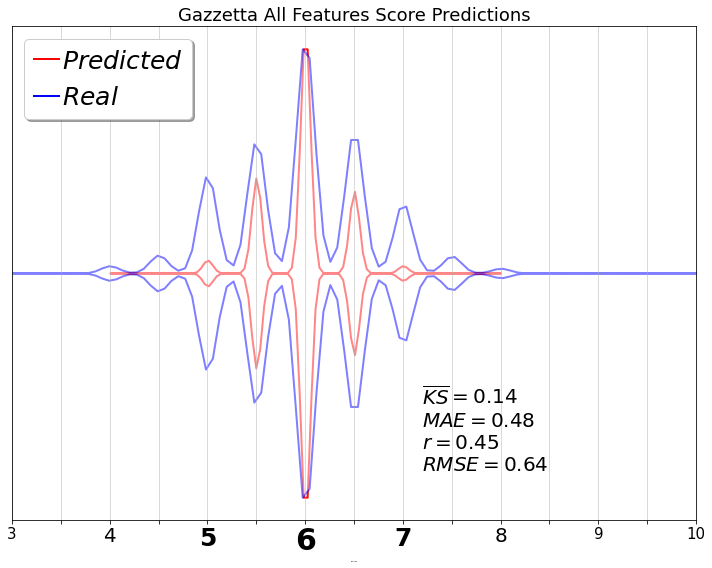

In [24]:
plotViolinPlotPreditctionDistribution(gazzettaPredict, gazzettaTrue, 'Gazzetta All Features')

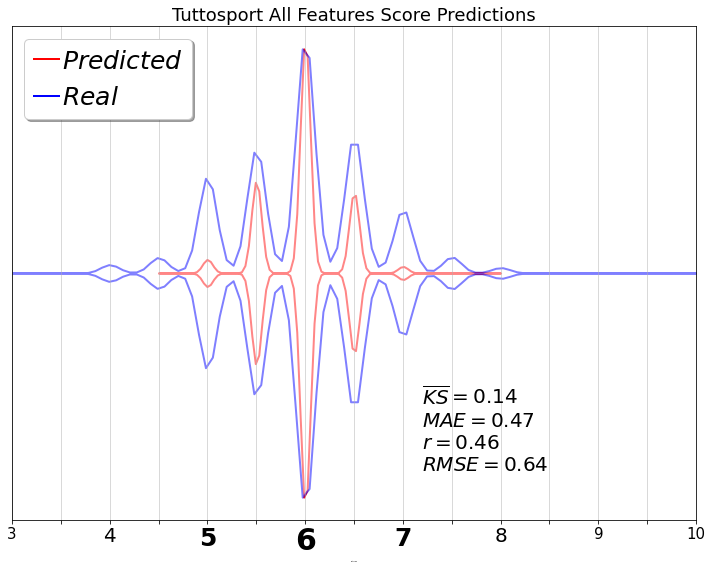

In [25]:
plotViolinPlotPreditctionDistribution(tuttosportPredict, tuttosportTrue, 'Tuttosport All Features')

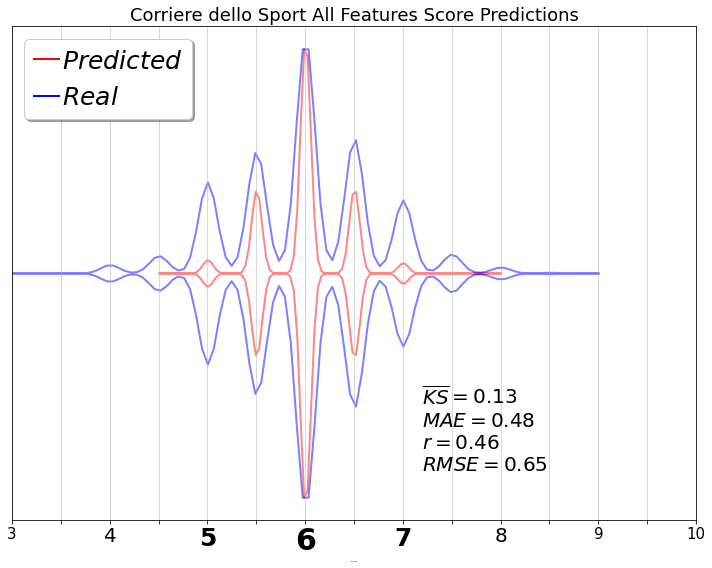

In [26]:
plotViolinPlotPreditctionDistribution(corrierePredict, corriereTrue, 'Corriere dello Sport All Features')

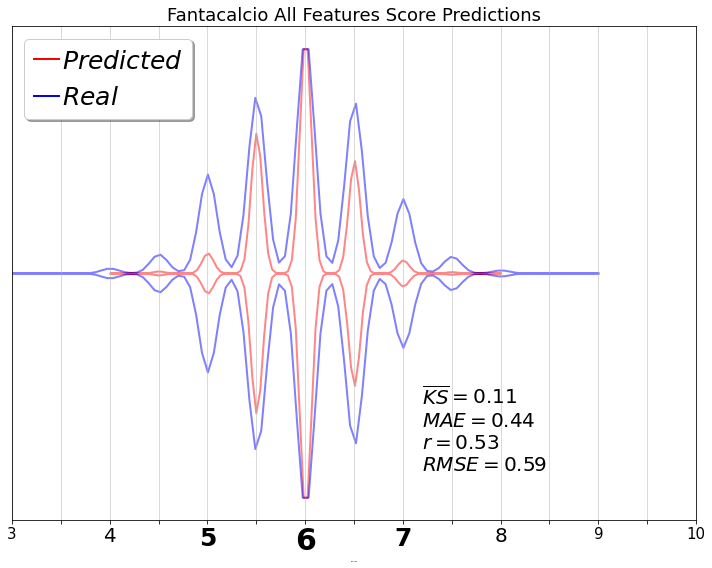

In [27]:
plotViolinPlotPreditctionDistribution(fantacalcioPredict, fantacalcioTrue, 'Fantacalcio All Features')

In [28]:
def correlation_predicts_true(orig_x, orig_y, name1, name2, plot_type='scatter', concordance=None):
    '''

    :param orig_x: list of ratings of a newspaper
    :param orig_y: list of ratings of a comparing newspaper
    :param name1: name of the first newspaper
    :param name2: name of the second newspaper
    :param plot_type: always scatter plot
    :param concordance: always set to none
    :return:
            A scatter plot that put in correlation the two newspaper analyzing concordances and discordances
    '''
    x, y = [], []
    for a, b in zip(orig_x, orig_y):
        if concordance == True:  # we take just the concordant ratings
            if (a >= 6 and b >= 6) or (a < 6 and b < 6):
                x.append(a)
                y.append(b)
        elif concordance == False:
            if (a >= 6 and b < 6) or (a < 6 and b >= 6):
                x.append(a)
                y.append(b)
        else:
            x.append(a)
            y.append(b)

    # compute max error
    diffs = []
    for a, b in zip(x, y):
        diffs.append(math.fabs(a - b))
    max_diff = max(diffs)

    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()
    if plot_type == 'scatter':
        xy = np.vstack([x, y])
        z = stats.gaussian_kde(xy)(xy)
        print(z)
        # Sort the points by density, so that the densest points are plotted last
        sc = plt.scatter(x, y, s=(z * 150) + 20, linewidth=0.1, zorder=1, marker='o', alpha=0.2, norm=LogNorm())
    else:
        bb = [len(np.arange(min(x), max(x) + 0.5, 0.5)), len(np.arange(min(y), max(y) + 0.5, 0.5))]
        plt.hist2d(x, y, bins=bb, normed=False, norm=LogNorm(), alpha=0.7)
        # plt.colorbar(pad=0.01)

    plt.plot([0, 10], [0, 10], color='k', alpha=0.5)
    lr = LinearRegression(normalize=True)
    new_x, new_y = [[xx] for xx in x], [[yy] for yy in y]
    score = cross_val_score(lr, new_x, new_y, cv=10, scoring='r2')
    avg_score = np.mean(score)

    pearson, pvalue = pearsonr(x, y)
    rmse_val = round(math.sqrt(mean_squared_error(x, y)), 2)
    ks = ks_2samp(x, y)[0]
    plt.xlim(-0., 10.)
    plt.ylim(-0., 10.)
    plt.annotate("$r=%s$\n$KS=%s$\n$RMSE=%s$" % (round(pearson, 2), round(ks, 2), rmse_val), xy=(0.05, 0.75),
                 xycoords='axes fraction', fontsize=21)
    # plt.annotate('$diff_{max}=%s$' %max_diff, xy=(0.635, 0.2),
    #             xycoords='axes fraction', fontsize=18)
    plt.xlabel("%s ratings" % name1, fontsize=12)
    plt.ylabel("%s ratings" % name2, fontsize=12)

    plt.vlines(6, 0, 10)
    plt.hlines(6, 0, 10)

    plt.xticks(range(0, 11), fontsize=10)
    plt.yticks(range(0, 11), fontsize=10)
    ax.xaxis.get_major_ticks()[6].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[6].label1.set_fontsize(20)
    ax.yaxis.get_major_ticks()[6].label1.set_fontweight('bold')
    ax.yaxis.get_major_ticks()[6].label1.set_fontsize(20)

    plt.fill_between([6, 10], 6, color='k', alpha=0.05, label='disagreement')
    plt.fill_between([0, 6], 6, 10, color='k', alpha=0.05)
    plt.legend(loc=3, fontsize=18, frameon=True, shadow=True, handletextpad=0.2)
    plt.grid(alpha=0.2)
    fig.tight_layout()
    plt.show()

[3.73910496 2.20837748 2.20837748 ... 3.73910496 3.73910496 3.73910496]


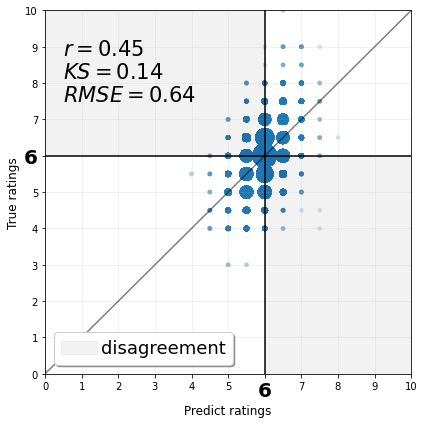

In [29]:
concordance = None
correlation_predicts_true(gazzettaPredict, gazzettaTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

[1.7343258  2.80036796 0.69551355 ... 2.80036796 1.94723935 2.80036796]


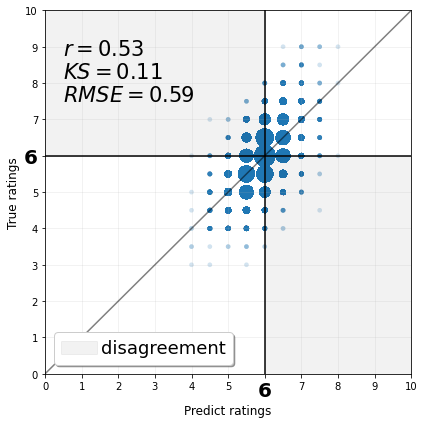

In [30]:
concordance = None
correlation_predicts_true(fantacalcioPredict, fantacalcioTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

## Neural Network Approach

Multi Classification.

We mapped each marks into a single label using the labelencoder

Then we created a model able to destinguish for each record the probability (using softmax) of being of a specific label

In [31]:
# Load libraries
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, RMSprop
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

Using TensorFlow backend.


In [32]:
def createNeuralNetworkAll(output_classes, optimizer, rate, activation, init_mode):
    model = Sequential()
    model.add(Dense(128, input_dim=154, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(rate = rate))
    model.add(Dense(64, kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(rate = rate))
    model.add(Dense(64, kernel_initializer=init_mode,activation=activation))
    model.add(Dense(output_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

def createNeuralNetworkGK(output_classes,optimizer, rate, activation, init_mode):
    model = Sequential()
    model.add(Dense(128, input_dim=148, kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(rate = rate))
    model.add(Dense(64, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(rate = rate))
    model.add(Dense(64, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(output_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


forNeural = df.copy(deep=True)
results = {}
distributionPerNewspaper = {}
#for each newspaper 
for newspaper in listMarks:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    #for each role
    for role in listRoles:
        if(newspaper != 'fantacalcio_score'):
            X = forNeural[forNeural['player_role_newspaper'] == role]
        else:
            X = forNeural[forNeural['player_role_fantacalcio'] == role]
        #extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        X['contextual_against_club_name'] = le_teams.fit_transform(X['contextual_against_club_name'])
        X['contextual_club_name'] = le_teams.transform(X['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        X['country'] = le_country.fit_transform(X['country'])
        
        if(newspaper == 'corriere_score'):
            X = X[X['corriere_score'] != 10]
        if(newspaper == 'corriere_score' and role == 'D'):
            X = X[X['corriere_score'] != 8]
            X = X[X['corriere_score'] != 3.5]
        if(newspaper == 'corriere_score' and role == 'P'):
            X = X[X['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 10]
        if(newspaper == 'gazzetta_score' and role == 'D'):
            subDF = subDF[subDF['gazzetta_score'] != 8]
            subDF = subDF[subDF['gazzetta_score'] != 3.5]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 9]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 8.5]
    
        #ectract and encode labels
        le = preprocessing.LabelEncoder()
        y = X[newspaper]
        minimum = min(y)
        maximum = max(y)
        print(minimum)
        print(maximum)
        le.fit(X[newspaper])
        y = le.transform(y)
        
        for el in toRemove:
            del X[el]
            
        print(list(le.classes_))
        print(len(list(le.classes_)))
            
            
        #uncomment to train without contextual variables
        #for el in toRemoveWithoutContextual:
        #    del subDF[el]
            
        #uncomment to train without ratings variables
        #for el in toRemoveRatings:
        #    del subDF[el]
        
        stringMatch = newspaper + '_' + role
        
        results[stringMatch] = {}        
        
        p = 0
        #remove player rank values for goalkeeper
        if(role == 'P'):
            for rat in ratings:
                del X[rat]
            p = 1
        print(stringMatch)
        
        robust = preprocessing.RobustScaler()
        X = robust.fit_transform(X)
        
        seed = 17
        
        
        #HYPERPARAMETHERS TUNING
        if(role != 'P'):
            #create the model
            model = KerasClassifier(createNeuralNetworkAll, verbose=0)
        else:
            model = KerasClassifier(createNeuralNetworkGK, verbose=0)
        
        # define the grid search parameters
        batch_size = [16, 32]
        epochs = [2, 5, 10,15,20]
        optimizer = ['SGD', 'RMSprop', 'Adam']
        dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
        init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
        classes_out = [len(list(le.classes_))]
        
        param_grid = dict(batch_size=batch_size, epochs=epochs, output_classes=classes_out, optimizer=optimizer, rate=dropout_rate, activation=activation, init_mode = init_mode)
        kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
        
        # Search in action!
        n_iter_search = 16 # Number of parameter settings that are sampled.
        random_search = RandomizedSearchCV(estimator=model, 
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=1, 
                                           cv=kfold, 
                                           verbose=1)
        random_search.fit(X, y)
        
        bestP = random_search.best_params_

        # Show the results
        print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
        
        
        #CREATE THE MODEL WITH BEST PARAMETERS AND MAKE PREDICTIONS
        kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
        for train, test in kfold.split(X, y):
            if(role != 'P'):
                #create the model
                model = createNeuralNetworkAll(bestP['output_classes'], bestP['optimizer'], bestP['rate'], bestP['activation'], bestP['init_mode'])
            else:
                model = createNeuralNetworkGK(bestP['output_classes'], bestP['optimizer'], bestP['rate'], bestP['activation'], bestP['init_mode'])
            
            model.fit(X,y, batch_size=bestP['batch_size'], epochs=bestP['epochs'],verbose=1)
            predictions = model.predict(X[test])
            final_y_t = y[test]
        
        predict_class = np.argmax(predictions, axis=1)
        predict_class = predict_class.tolist()
        y_pred = le.inverse_transform(predict_class)
        y_true = le.inverse_transform(final_y_t)
        print(y_pred)
        print(y_true)
        print(len(y_pred))
        print(len(y_true))
        results[stringMatch]['r'] = pearsonr(y_true, y_pred)[0]
        results[stringMatch]['RSME'] = math.sqrt(mean_squared_error(y_true, y_pred))
        results[stringMatch]['Accuracy'] = accuracy_score(le.transform(y_true), le.transform(y_pred))
        results[stringMatch]['KS'] = ks_2samp(y_true, y_pred)[0]
        results[stringMatch]['r2'] = r2_score(y_true, y_pred)
        
        distributionPerNewspaper[newspaper]['true'].append(y_true)
        distributionPerNewspaper[newspaper]['pred'].append(y_pred)

3.5
9.0
[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
12
fantacalcio_score_C
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  3.4min finished


Best: 0.451051 using {'rate': 0.0, 'output_classes': 12, 'optimizer': 'RMSprop', 'init_mode': 'uniform', 'epochs': 10, 'batch_size': 32, 'activation': 'softplus'}
Epoch 1/10
9571/9571 [==============================] - 1s 103us/step - loss: 1.4781 - accuracy: 0.3754
Epoch 2/10
9571/9571 [==============================] - 1s 96us/step - loss: 1.3181 - accuracy: 0.4287
Epoch 3/10
9571/9571 [==============================] - 1s 103us/step - loss: 1.2824 - accuracy: 0.4418
Epoch 4/10
9571/9571 [==============================] - 1s 102us/step - loss: 1.2655 - accuracy: 0.4467
Epoch 5/10
9571/9571 [==============================] - 1s 102us/step - loss: 1.2564 - accuracy: 0.4490
Epoch 6/10
9571/9571 [==============================] - ETA: 0s - loss: 1.2470 - accuracy: 0.44 - 1s 100us/step - loss: 1.2475 - accuracy: 0.4495
Epoch 7/10
9571/9571 [==============================] - 1s 94us/step - loss: 1.2385 - accuracy: 0.4613
Epoch 8/10
9571/9571 [==============================] - 1s 89us/step 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  2.5min finished


Best: 0.462870 using {'rate': 0.2, 'output_classes': 11, 'optimizer': 'RMSprop', 'init_mode': 'normal', 'epochs': 10, 'batch_size': 16, 'activation': 'hard_sigmoid'}
Epoch 1/10
5185/5185 [==============================] - 1s 271us/step - loss: 1.6464 - accuracy: 0.3335
Epoch 2/10
5185/5185 [==============================] - 1s 204us/step - loss: 1.4211 - accuracy: 0.4083
Epoch 3/10
5185/5185 [==============================] - 1s 128us/step - loss: 1.3664 - accuracy: 0.4125
Epoch 4/10
5185/5185 [==============================] - 1s 131us/step - loss: 1.3232 - accuracy: 0.4320
Epoch 5/10
5185/5185 [==============================] - 1s 166us/step - loss: 1.3038 - accuracy: 0.4341
Epoch 6/10
5185/5185 [==============================] - 1s 149us/step - loss: 1.2738 - accuracy: 0.45710s - loss: 1
Epoch 7/10
5185/5185 [==============================] - 1s 225us/step - loss: 1.2638 - accuracy: 0.4598
Epoch 8/10
5185/5185 [==============================] - 1s 163us/step - loss: 1.2575 - accurac

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  3.7min finished


Best: 0.426721 using {'rate': 0.5, 'output_classes': 11, 'optimizer': 'Adam', 'init_mode': 'lecun_uniform', 'epochs': 15, 'batch_size': 32, 'activation': 'softsign'}
Epoch 1/15
8727/8727 [==============================] - 1s 136us/step - loss: 1.6554 - accuracy: 0.3245
Epoch 2/15
8727/8727 [==============================] - 1s 117us/step - loss: 1.4138 - accuracy: 0.3942
Epoch 3/15
8727/8727 [==============================] - 1s 109us/step - loss: 1.3825 - accuracy: 0.4000
Epoch 4/15
8727/8727 [==============================] - 1s 95us/step - loss: 1.3573 - accuracy: 0.4093
Epoch 5/15
8727/8727 [==============================] - 1s 110us/step - loss: 1.3463 - accuracy: 0.4182
Epoch 6/15
8727/8727 [==============================] - 1s 84us/step - loss: 1.3427 - accuracy: 0.4188
Epoch 7/15
8727/8727 [==============================] - 1s 119us/step - loss: 1.3372 - accuracy: 0.4172
Epoch 8/15
8727/8727 [==============================] - 1s 123us/step - loss: 1.3348 - accuracy: 0.4202
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.3min finished


Best: 0.455217 using {'rate': 0.0, 'output_classes': 11, 'optimizer': 'RMSprop', 'init_mode': 'uniform', 'epochs': 5, 'batch_size': 32, 'activation': 'linear'}
Epoch 1/5
2032/2032 [==============================] - 0s 141us/step - loss: 1.6701 - accuracy: 0.4198
Epoch 2/5
2032/2032 [==============================] - 0s 62us/step - loss: 1.4029 - accuracy: 0.4631
Epoch 3/5
2032/2032 [==============================] - 0s 59us/step - loss: 1.3388 - accuracy: 0.4705
Epoch 4/5
2032/2032 [==============================] - 0s 70us/step - loss: 1.3099 - accuracy: 0.4695
Epoch 5/5
2032/2032 [==============================] - 0s 90us/step - loss: 1.2961 - accuracy: 0.4818
Epoch 1/5
2032/2032 [==============================] - 0s 135us/step - loss: 1.6649 - accuracy: 0.4075
Epoch 2/5
2032/2032 [==============================] - 0s 78us/step - loss: 1.4092 - accuracy: 0.4572
Epoch 3/5
2032/2032 [==============================] - 0s 93us/step - loss: 1.3398 - accuracy: 0.4665
Epoch 4/5
2032/2032 [=

In [33]:
res = extractResultToDataframe(results)
res = addAdditionalMetricsToDataframeResult(res)

In [34]:
## Neural network summary

res

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,fantacalcio_score_C,0.458463,0.479415,0.082968,0.503482,0.726600,0.686286,0.726600,0.686286,0.040314
1,fantacalcio_score_A,0.446393,0.479552,0.184028,0.685102,0.833404,0.686286,0.833404,0.686286,0.147118
2,fantacalcio_score_D,0.474179,0.456567,0.069906,0.489434,0.709546,0.686286,0.709546,0.686286,0.023259
3,fantacalcio_score_P,0.518838,0.480315,0.149606,0.200706,0.475595,0.686286,0.475595,0.686286,-0.210691


save the result on a csv

In [29]:
res.to_csv(os.path.join(DATA_PATH, 'neural_network_01_performances_all.csv'), index = False)

save true and predicted value for each newspaper role

In [35]:
true, predict = extract_true_and_predicted(distributionPerNewspaper)

In [31]:
gazzettaTrue = true['gazzetta_score']
gazzettaPredict = predict['gazzetta_score']
fantacalcioTrue = true['fantacalcio_score']
fantacalcioPredict = predict['fantacalcio_score']

In [32]:
np.save(os.path.join(DATA_PATH,'nn_1_true_predictions_all.npy'), true) 

In [33]:
np.save(os.path.join(DATA_PATH, 'nn_1_predictions_all.npy'), predict) 

In [18]:
# Load
true1 = np.load(os.path.join(DATA_PATH,'nn_1_true_predictions_all.npy'),allow_pickle='TRUE').item()
predict1 = np.load(os.path.join(DATA_PATH, 'nn_1_predictions_all.npy'),allow_pickle='TRUE').item()

In [19]:
gazzettaTrue = true1['gazzetta_score']
gazzettaPredict = predict1['gazzetta_score']
fantacalcioTrue = true1['fantacalcio_score']
fantacalcioPredict = predict1['fantacalcio_score']

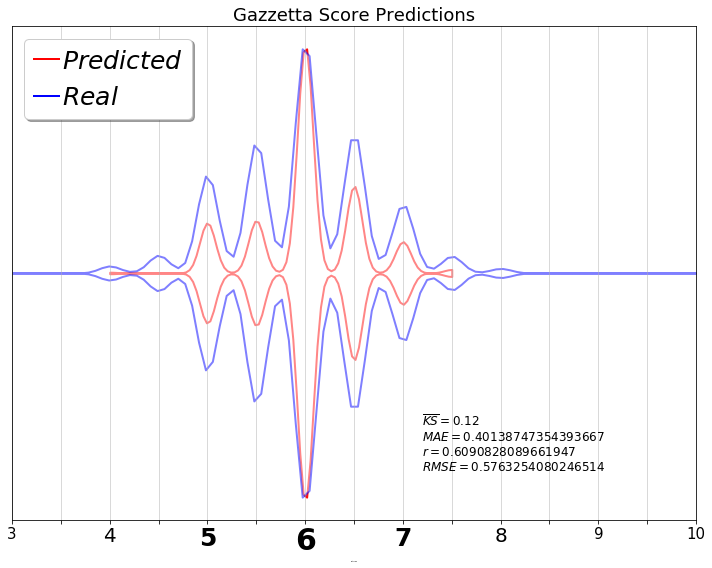

In [20]:
plotViolinPlotPreditctionDistribution(gazzettaPredict, gazzettaTrue, 'Gazzetta')

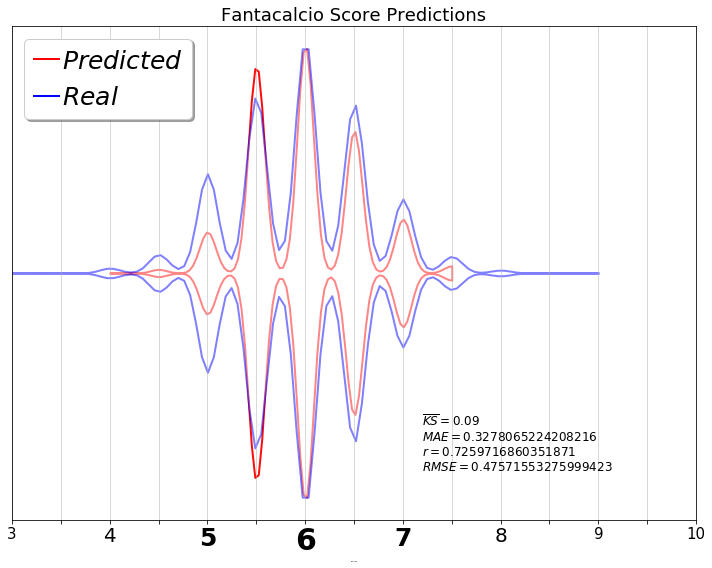

In [21]:
plotViolinPlotPreditctionDistribution(fantacalcioPredict, fantacalcioTrue, 'Fantacalcio')

[0.90264486 0.07552856 1.22590734 ... 0.65594867 0.65594867 2.68248444]


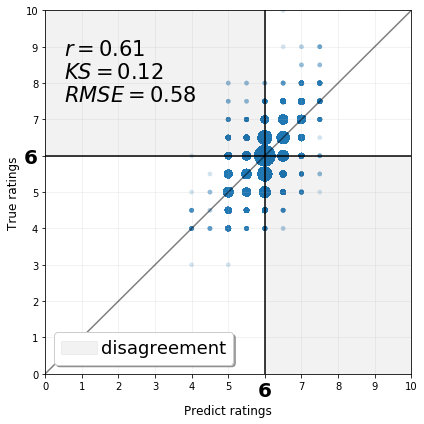

In [22]:
correlation_predicts_true(gazzettaPredict, gazzettaTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

[0.1391864  1.04716123 1.12909766 ... 0.71609202 2.22904435 0.23235618]


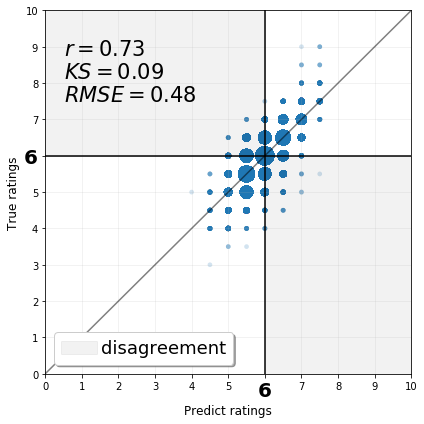

In [23]:
correlation_predicts_true(fantacalcioPredict, fantacalcioTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

# Neural Network Approach 2.

We map the marks into an array of lenght 20, each index correspond to a class. 
example:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] = 7.5

The idea is to create a neural network that is able to predict the position of the 1 inside the array

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import PredefinedSplit

import operator

Using TensorFlow backend.


#### all roles analysis

In [38]:
def nn_all_2_method(optimizer, rate, init_mode, alpha):
    visible = Input(shape=(154,))
    hidden1 = Dense(64, kernel_initializer=init_mode)(visible)
    hidden2 = LeakyReLU(alpha=alpha)(hidden1)
    hidden3 = Dense(64, kernel_initializer=init_mode)(hidden2)
    hidden4 = LeakyReLU(alpha= alpha)(hidden3)
    hidden5 = Dropout(rate=rate)(hidden4)
    hidden6 = Dense(64, kernel_initializer=init_mode)(hidden5)
    hidden7 = LeakyReLU(alpha=alpha)(hidden6)
    hidden8 = Dropout(rate=rate)(hidden7)
    hidden9 = Dense(32, kernel_initializer=init_mode)(hidden8)
    hidden10 = LeakyReLU(alpha=alpha)(hidden9)
    output = Dense(21, activation='softmax')(hidden10)
    model = Model(inputs=visible, outputs=output)
    model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])
    return model

def nn_gk_2_method(optimizer, rate, init_mode, alpha):
    visible = Input(shape=(148,))
    hidden1 = Dense(64, kernel_initializer=init_mode)(visible)
    hidden2 = LeakyReLU(alpha=alpha)(hidden1)
    hidden3 = Dense(64, kernel_initializer=init_mode)(hidden2)
    hidden4 = LeakyReLU(alpha= alpha)(hidden3)
    hidden5 = Dropout(rate=rate)(hidden4)
    hidden6 = Dense(64, kernel_initializer=init_mode)(hidden5)
    hidden7 = LeakyReLU(alpha=alpha)(hidden6)
    hidden8 = Dropout(rate=rate)(hidden7)
    hidden9 = Dense(32, kernel_initializer=init_mode)(hidden8)
    hidden10 = LeakyReLU(alpha=alpha)(hidden9)
    output = Dense(21, activation='softmax')(hidden10)
    model = Model(inputs=visible, outputs=output)
    model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])
    return model

def getRemappedPredictions(predictions):
    remappedPred = []
    for el in predictions:
        index, value = max(enumerate(el), key=operator.itemgetter(1))
        score = float(index/2)
        remappedPred.append(score)
    return remappedPred

#encode labels into an array
def encodeToArray(listOfMarks):
    arrayOfEncoding = []
    for el in listOfMarks:
        sentinel = [0] * 21
        access = int(el*2)
        sentinel[access] = 1
        arrayOfEncoding.append(sentinel)
    return arrayOfEncoding


forNeural = df.copy(deep=True)
results = {}
distributionPerNewspaper = {}
# for each newspaper
for newspaper in listMarks:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    # for each role
    for role in listRoles:
        if (newspaper != 'fantacalcio_score'):
            X = forNeural[forNeural['player_role_newspaper'] == role]
        else:
            X = forNeural[forNeural['player_role_fantacalcio'] == role]
        # extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        X['contextual_against_club_name'] = le_teams.fit_transform(X['contextual_against_club_name'])
        X['contextual_club_name'] = le_teams.transform(X['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        X['country'] = le_country.fit_transform(X['country'])

        if (newspaper == 'corriere_score'):
            X = X[X['corriere_score'] != 10]
        if (newspaper == 'corriere_score' and role == 'D'):
            X = X[X['corriere_score'] != 8]
            X = X[X['corriere_score'] != 3.5]
        if (newspaper == 'corriere_score' and role == 'P'):
            X = X[X['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 10]
        if(newspaper == 'gazzetta_score' and role == 'D'):
            subDF = subDF[subDF['gazzetta_score'] != 8]
            subDF = subDF[subDF['gazzetta_score'] != 3.5]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 9]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 8.5]

        # ectract and encode labels
        le = preprocessing.LabelEncoder()
        y = X[newspaper]
        le.fit(X[newspaper])
        y = le.transform(y)

        for el in toRemove:
            del X[el]

        print(list(le.classes_))
        print(len(list(le.classes_)))

        # uncomment to train without contextual variables
        # for el in toRemoveWithoutContextual:
        #    del subDF[el]

        # uncomment to train without ratings variables
        # for el in toRemoveRatings:
        #    del subDF[el]

        stringMatch = newspaper + '_' + role

        results[stringMatch] = {}

        p = 0
        # remove player rank values for goalkeeper
        if (role == 'P'):
            for rat in ratings:
                del X[rat]
            p = 1
        print(stringMatch)

        # extract a train set that have a quite high number of
        found = True
        while found:
            # split data
            x_train, x_val, y_train, y_val = train_test_split(X, y)
            insideFound = False
            for el in Counter(y_train).values():
                if (el < 3):
                    insideFound = True
            if (not insideFound):
                found = False

        sm = SMOTE(random_state=17, k_neighbors=2)
        X_res, Y_res = sm.fit_sample(x_train, y_train)

        # reverse the label encoding transform
        y_train = le.inverse_transform(Y_res)
        # reverse label encoding
        y_val = le.inverse_transform(y_val)

        '''
        StandardScaler removes the mean and scales the data to unit variance. 
        However, the outliers have an influence when computing the empirical 
        mean and standard deviation which shrink the range of the feature values.
        StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
        '''
        # standardize = StandardScaler()
        # standardize.fit(X_res)
        # x_train = standardize.transform(X_res)
        # x_val = standardize.transform(x_val)

        '''
        MinMaxScaler rescales the data set such that all feature values are in the range [0, 1].
        As StandardScaler, MinMaxScaler is very sensitive to the presence of outliers.
        '''
        # minMax = MinMaxScaler()
        # minMax.fit(X_res)
        # x_train = minMax.transform(X_res)
        # x_val = minMax.transform(x_val)

        '''
        The centering and scaling statistics of this RobustScaler are based on percentiles and are therefore not influenced 
        by a few number of very large marginal outliers. 
        Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and,
        more importantly, are approximately similar: most of the transformed values lie in a [-2, 3] range. 
        Note that the outliers themselves are still present in the transformed data. 
        '''
        robust = RobustScaler()
        robust.fit(X_res)
        x_train = robust.transform(X_res)
        x_val = robust.transform(x_val)


        y_enc_train = encodeToArray(y_train)
        y_enc_test = encodeToArray(y_val)

        y_enc_train = np.array(y_enc_train)
        y_enc_test = np.array(y_enc_test)

        seed = 17

        # HYPERPARAMETHERS TUNING
        if (role != 'P'):
            # create the model
            model = KerasClassifier(nn_all_2_method, verbose=0)
        else:
            model = KerasClassifier(nn_gk_2_method, verbose=0)

        # define the grid search parameters
        batch_size = [16, 32]
        epochs = [2, 5, 10, 15, 20]
        optimizer = ['SGD', 'RMSprop', 'Adam']
        alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
                     'he_uniform']
        classes_out = [len(list(le.classes_))]

        param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer,
                          rate=dropout_rate, init_mode=init_mode, alpha = alpha)

        cvx = np.concatenate([x_train, x_val])
        cvy = np.concatenate([y_enc_train, y_enc_test])
        
        zeros = np.zeros(x_val.shape[0])
        azz = np.full(x_train.shape[0], -1)
        split_index = np.concatenate((np.array(azz), np.array(zeros)))
        
        # Use the list to create PredefinedSplit
        pds = PredefinedSplit(test_fold = split_index)
        
        print(pds.get_n_splits())

        # Search in action!
        n_iter_search = 16  # Number of parameter settings that are sampled.
        random_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=1,
                                           cv=pds,
                                           verbose=1)
        random_search.fit(cvx, cvy)

        bestP = random_search.best_params_

        # Show the results
        print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

        if (role != 'P'):
        # create the model
            model = nn_all_2_method(bestP['optimizer'], bestP['rate'],
                                           bestP['init_mode'], bestP['alpha'])
        else:
            model = nn_gk_2_method(bestP['optimizer'], bestP['rate'],
                                           bestP['init_mode'], bestP['alpha'])

        model.fit(x_train, y_enc_train, batch_size=bestP['batch_size'], epochs=bestP['epochs'], verbose=1)
        predictions = model.predict(x_val)
        
        remapped = getRemappedPredictions(predictions)
        y_pred = remapped
        y_true = y_val
        results[stringMatch]['r'] = pearsonr(y_true, y_pred)[0]
        results[stringMatch]['RSME'] = math.sqrt(mean_squared_error(y_true, y_pred))
        results[stringMatch]['Accuracy'] = accuracy_score(le.transform(y_true),le.transform(y_pred))
        results[stringMatch]['KS'] = ks_2samp(y_true, y_pred)[0]
        results[stringMatch]['r2'] = r2_score(y_true, y_pred)

        distributionPerNewspaper[newspaper]['true'].append(y_true)
        distributionPerNewspaper[newspaper]['pred'].append(y_pred)

[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
12
fantacalcio_score_C
1
Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 10.0min finished


Best: 0.419557 using {'rate': 1, 'optimizer': 'SGD', 'init_mode': 'glorot_uniform', 'epochs': 15, 'batch_size': 32, 'alpha': 0.5}
Epoch 1/15
23958/23958 [==============================] - 2s 98us/step - loss: 1.5143 - accuracy: 0.4782
Epoch 2/15
23958/23958 [==============================] - 2s 81us/step - loss: 0.9276 - accuracy: 0.6327
Epoch 3/15
23958/23958 [==============================] - 2s 80us/step - loss: 0.8020 - accuracy: 0.6764
Epoch 4/15
23958/23958 [==============================] - 2s 84us/step - loss: 0.7392 - accuracy: 0.7035
Epoch 5/15
23958/23958 [==============================] - 2s 75us/step - loss: 0.6943 - accuracy: 0.7204
Epoch 6/15
23958/23958 [==============================] - 2s 90us/step - loss: 0.6645 - accuracy: 0.7304
Epoch 7/15
23958/23958 [==============================] - 2s 77us/step - loss: 0.6393 - accuracy: 0.7399
Epoch 8/15
23958/23958 [==============================] - 2s 79us/step - loss: 0.6180 - accuracy: 0.7481
Epoch 9/15
23958/23958 [======

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  4.2min finished


Best: 0.457209 using {'rate': 0.1, 'optimizer': 'RMSprop', 'init_mode': 'uniform', 'epochs': 10, 'batch_size': 16, 'alpha': 0.2}
Epoch 1/10
10747/10747 [==============================] - 2s 207us/step - loss: 1.3095 - accuracy: 0.4800
Epoch 2/10
10747/10747 [==============================] - 2s 200us/step - loss: 0.8008 - accuracy: 0.6587
Epoch 3/10
10747/10747 [==============================] - 2s 202us/step - loss: 0.7020 - accuracy: 0.7048
Epoch 4/10
10747/10747 [==============================] - 2s 191us/step - loss: 0.6515 - accuracy: 0.7220
Epoch 5/10
10747/10747 [==============================] - 2s 203us/step - loss: 0.6088 - accuracy: 0.7407
Epoch 6/10
10747/10747 [==============================] - 2s 189us/step - loss: 0.5861 - accuracy: 0.7522
Epoch 7/10
10747/10747 [==============================] - 2s 189us/step - loss: 0.5631 - accuracy: 0.7585
Epoch 8/10
10747/10747 [==============================] - 2s 190us/step - loss: 0.5423 - accuracy: 0.7698
Epoch 9/10
10747/10747 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  9.5min finished


Best: 0.396884 using {'rate': 0.1, 'optimizer': 'RMSprop', 'init_mode': 'glorot_uniform', 'epochs': 20, 'batch_size': 16, 'alpha': 0.4}
Epoch 1/20
19730/19730 [==============================] - 3s 167us/step - loss: 1.2105 - accuracy: 0.5238
Epoch 2/20
19730/19730 [==============================] - 3s 140us/step - loss: 0.8964 - accuracy: 0.6319
Epoch 3/20
19730/19730 [==============================] - 4s 196us/step - loss: 0.8163 - accuracy: 0.6682
Epoch 4/20
19730/19730 [==============================] - 3s 136us/step - loss: 0.7666 - accuracy: 0.6896
Epoch 5/20
19730/19730 [==============================] - 3s 167us/step - loss: 0.7396 - accuracy: 0.7011
Epoch 6/20
19730/19730 [==============================] - 3s 159us/step - loss: 0.7162 - accuracy: 0.7050
Epoch 7/20
19730/19730 [==============================] - 4s 209us/step - loss: 0.6983 - accuracy: 0.7132
Epoch 8/20
19730/19730 [==============================] - 3s 156us/step - loss: 0.6816 - accuracy: 0.7224
Epoch 9/20
19730

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  2.7min finished


Best: 0.362205 using {'rate': 0.1, 'optimizer': 'RMSprop', 'init_mode': 'glorot_normal', 'epochs': 5, 'batch_size': 32, 'alpha': 0.1}
Epoch 1/5
5877/5877 [==============================] - 1s 169us/step - loss: 1.6086 - accuracy: 0.4424
Epoch 2/5
5877/5877 [==============================] - 1s 101us/step - loss: 0.9503 - accuracy: 0.6286
Epoch 3/5
5877/5877 [==============================] - 1s 115us/step - loss: 0.7705 - accuracy: 0.7009
Epoch 4/5
5877/5877 [==============================] - 1s 114us/step - loss: 0.6619 - accuracy: 0.7427
Epoch 5/5
5877/5877 [==============================] - 1s 113us/step - loss: 0.5892 - accuracy: 0.7671


In [39]:
res = extractResultToDataframe(results)
res = addAdditionalMetricsToDataframeResult(res)

In [40]:
res

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,fantacalcio_score_C,0.537946,0.404931,0.129127,0.320124,0.672794,0.628378,0.672794,0.628378,0.044417
1,fantacalcio_score_A,0.515750,0.443331,0.080956,0.583583,0.789853,0.628378,0.789853,0.628378,0.161475
2,fantacalcio_score_D,0.592885,0.356554,0.061870,0.151842,0.608348,0.628378,0.608348,0.628378,-0.020029
3,fantacalcio_score_P,0.632922,0.348425,0.080709,-0.113759,0.442516,0.628378,0.442516,0.628378,-0.185862


In [45]:
res.to_csv(os.path.join(DATA_PATH, 'neural_network_02_performances_all.csv'), index = False)

In [41]:
true, predict = extract_true_and_predicted(distributionPerNewspaper)

In [22]:
gazzettaTrue = true['gazzetta_score']
gazzettaPredict = predict['gazzetta_score']
fantacalcioTrue = true['fantacalcio_score']
fantacalcioPredict = predict['fantacalcio_score']

In [48]:
np.save(os.path.join(DATA_PATH, 'nn_2_true_predictions_all.npy'), true) 

np.save(os.path.join(DATA_PATH, 'nn_2_predictions_all.npy'), predict) 

In [31]:
# Load
true1 = np.load(os.path.join(DATA_PATH, 'nn_2_true_predictions_all.npy'),allow_pickle='TRUE').item()
predict1 = np.load(os.path.join(DATA_PATH, 'nn_2_predictions_all.npy'),allow_pickle='TRUE').item()

In [32]:
gazzettaTrue = true1['gazzetta_score']
gazzettaPredict = predict1['gazzetta_score']
fantacalcioTrue = true1['fantacalcio_score']
fantacalcioPredict = predict1['fantacalcio_score']
corrierePredict = predict1['corriere_score']
corriereTrue = true1['corriere_score']

concordance = None

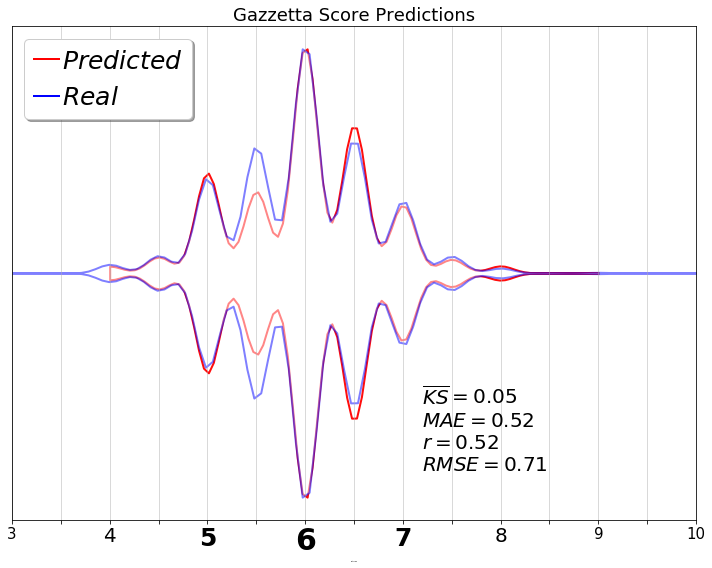

In [23]:
plotViolinPlotPreditctionDistribution(gazzettaPredict, gazzettaTrue, 'Gazzetta')

In [24]:
plotViolinPlotPreditctionDistribution(corrierePredict, corriereTrue, 'Corriere')

NameError: name 'corrierePredict' is not defined

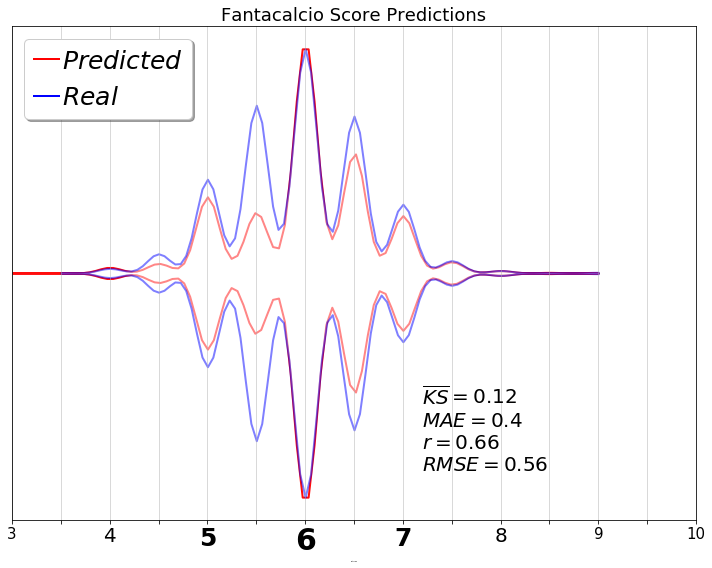

In [25]:
plotViolinPlotPreditctionDistribution(fantacalcioPredict, fantacalcioTrue, 'Fantacalcio')

[0.19235788 0.32413029 0.04560573 ... 0.32413029 0.08589378 0.02054108]


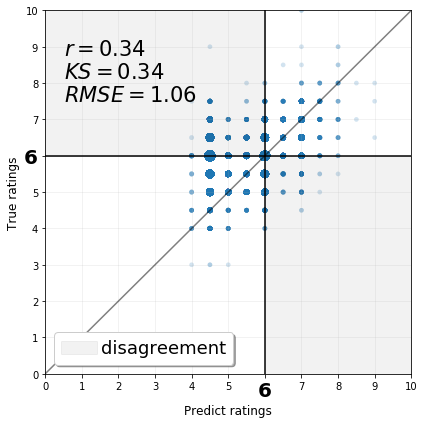

In [53]:
correlation_predicts_true(gazzettaPredict, gazzettaTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

[0.38832256 0.23626862 0.06479463 ... 0.27451453 0.33839312 0.05872291]


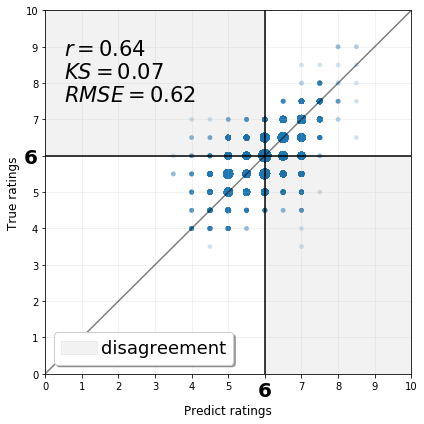

In [54]:
correlation_predicts_true(fantacalcioPredict, fantacalcioTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

# Neural network approach 3
### Compute Each Classess With different Models.

#### experiment for each role for each newspaper

In [8]:
def createModel_All(optimizer, rate, activation, init_mode):
    visible = Input(shape=(154,))
    hidden1 = Dense(64, activation=activation, kernel_initializer=init_mode)(visible)
    hidden2 = Dropout(rate=rate)(hidden1)
    hidden3 = Dense(32, activation=activation, kernel_initializer=init_mode)(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)
    model = Model(inputs=visible, outputs=output)
    model.compile(loss='binary_crossentropy',
  optimizer=optimizer, metrics=['accuracy'])
    # summarize layers
    #print(model.summary())
    return model

def createModel_GK(optimizer, rate, activation, init_mode):
    visible = Input(shape=(148,))
    hidden1 = Dense(64, activation=activation, kernel_initializer=init_mode)(visible)
    hidden2 = Dropout(rate=rate)(hidden1)
    hidden3 = Dense(32, activation=activation, kernel_initializer=init_mode)(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)
    model = Model(inputs=visible, outputs=output)
    model.compile(loss='binary_crossentropy',
  optimizer=optimizer, metrics=['accuracy'])
    # summarize layers
    #print(model.summary())
    return model

def getRemappedPredictions(predictions, minimum):
    remappedPred = []
    for el in predictions:
        index, value = max(enumerate(el), key=operator.itemgetter(1))
        score = float(index/2)
        if(score < minimum):
            remappedPred.append(minimum)
        else:
            remappedPred.append(score)
    return remappedPred

#encode labels into an array
def encodeToArray(listOfMarks):
    arrayOfEncoding = []
    for el in listOfMarks:
        sentinel = [0] * 21
        access = int(el*2)
        sentinel[access] = 1
        arrayOfEncoding.append(sentinel)
    return arrayOfEncoding


forNeural = df.copy(deep=True)
results = {}
distributionPerNewspaper = {}
# for each newspaper
for newspaper in listMarks:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    # for each role
    for role in listRoles:
        if (newspaper != 'fantacalcio_score'):
            X = forNeural[forNeural['player_role_newspaper'] == role]
        else:
            X = forNeural[forNeural['player_role_fantacalcio'] == role]
        # extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        X['contextual_against_club_name'] = le_teams.fit_transform(X['contextual_against_club_name'])
        X['contextual_club_name'] = le_teams.transform(X['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        X['country'] = le_country.fit_transform(X['country'])

        if (newspaper == 'corriere_score'):
            X = X[X['corriere_score'] != 10]
        if (newspaper == 'corriere_score' and role == 'D'):
            X = X[X['corriere_score'] != 8]
            X = X[X['corriere_score'] != 3.5]
        if (newspaper == 'corriere_score' and role == 'P'):
            X = X[X['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 10]
        if(newspaper == 'gazzetta_score' and role == 'D'):
            subDF = subDF[subDF['gazzetta_score'] != 8]
            subDF = subDF[subDF['gazzetta_score'] != 3.5]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 9]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 8.5]

        # ectract and encode labels
        le = preprocessing.LabelEncoder()
        y = X[newspaper]
        minimum = min(y)
        print(minimum)
        le.fit(X[newspaper])
        y = le.transform(y)

        for el in toRemove:
            del X[el]

        print(list(le.classes_))
        print(len(list(le.classes_)))
        

        # uncomment to train without contextual variables
        # for el in toRemoveWithoutContextual:
        #    del subDF[el]

        # uncomment to train without ratings variables
        # for el in toRemoveRatings:
        #    del subDF[el]

        stringMatch = newspaper + '_' + role

        results[stringMatch] = {}

        p = 0
        # remove player rank values for goalkeeper
        if (role == 'P'):
            for rat in ratings:
                del X[rat]
            p = 1
        print(stringMatch)

        # extract a train set that have a quite high number of
        found = True
        while found:
            # split data
            x_train, x_val, y_train, y_val = train_test_split(X, y)
            insideFound = False
            for el in Counter(y_train).values():
                if (el < 3):
                    insideFound = True
            if (not insideFound):
                found = False

        sm = SMOTE(random_state=17, k_neighbors=2)
        X_res, Y_res = sm.fit_sample(x_train, y_train)

        # reverse the label encoding transform
        y_train = le.inverse_transform(Y_res)
        # reverse label encoding
        y_val = le.inverse_transform(y_val)

        '''
        StandardScaler removes the mean and scales the data to unit variance. 
        However, the outliers have an influence when computing the empirical 
        mean and standard deviation which shrink the range of the feature values.
        StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
        '''
        # standardize = StandardScaler()
        # standardize.fit(X_res)
        # x_train = standardize.transform(X_res)
        # x_val = standardize.transform(x_val)

        '''
        MinMaxScaler rescales the data set such that all feature values are in the range [0, 1].
        As StandardScaler, MinMaxScaler is very sensitive to the presence of outliers.
        '''
        # minMax = MinMaxScaler()
        # minMax.fit(X_res)
        # x_train = minMax.transform(X_res)
        # x_val = minMax.transform(x_val)

        '''
        The centering and scaling statistics of this RobustScaler are based on percentiles and are therefore not influenced 
        by a few number of very large marginal outliers. 
        Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and,
        more importantly, are approximately similar: most of the transformed values lie in a [-2, 3] range. 
        Note that the outliers themselves are still present in the transformed data. 
        '''
        robust = RobustScaler()
        robust.fit(X_res)
        x_train = robust.transform(X_res)
        x_val = robust.transform(x_val)


        y_enc_train = encodeToArray(y_train)
        y_enc_test = encodeToArray(y_val)

        y_enc_train = np.array(y_enc_train)
        y_enc_test = np.array(y_enc_test)
        
        #divide the label into 20 different labels
        y0 = []
        y05 = []
        y1 = []
        y15 = []
        y2 = []
        y25 = []
        y3 = []
        y35 = []
        y4 = []
        y45 = []
        y5 = []
        y55 = []
        y6 = []
        y65 = []
        y7 = []
        y75 = []
        y8 = []
        y85 = []
        y9 = []
        y95 = []
        y10 = []

        for el in y_enc_train:
            y0.append(el[0])
            y05.append(el[1])
            y1.append(el[2])
            y15.append(el[3])
            y2.append(el[4])
            y25.append(el[5])
            y3.append(el[6])
            y35.append(el[7])
            y4.append(el[8])
            y45.append(el[9])
            y5.append(el[10])
            y55.append(el[11])
            y6.append(el[12])
            y65.append(el[13])
            y7.append(el[14])
            y75.append(el[15])
            y8.append(el[16])
            y85.append(el[17])
            y9.append(el[18])
            y95.append(el[19])
            y10.append(el[20])
        
        y0 = np.array(y0)
        y05 = np.array(y05)
        y1 = np.array(y1)
        y15 = np.array(y15)
        y2 = np.array(y2)
        y25 = np.array(y25)
        y3 = np.array(y3)
        y35 = np.array(y35)
        y4 = np.array(y4)
        y45 = np.array(y45)
        y5 = np.array(y5)
        y55 = np.array(y55)
        y6 = np.array(y6)
        y65 = np.array(y65)
        y7 = np.array(y7)
        y75 = np.array(y75)
        y8 = np.array(y8)
        y85 = np.array(y85)
        y9 = np.array(y9)
        y95 = np.array(y95)
        y10 = np.array(y10)

        #divide the label into 20 different labels
        y0val = []
        y05val = []
        y1val = []
        y15val = []
        y2val = []
        y25val = []
        y3val = []
        y35val = []
        y4val = []
        y45val = []
        y5val = []
        y55val = []
        y6val = []
        y65val = []
        y7val = []
        y75val = []
        y8val = []
        y85val = []
        y9val = []
        y95val = []
        y10val = []

        for el in y_enc_test:
            y0val.append(el[0])
            y05val.append(el[1])
            y1val.append(el[2])
            y15val.append(el[3])
            y2val.append(el[4])
            y25val.append(el[5])
            y3val.append(el[6])
            y35val.append(el[7])
            y4val.append(el[8])
            y45val.append(el[9])
            y5val.append(el[10])
            y55val.append(el[11])
            y6val.append(el[12])
            y65val.append(el[13])
            y7val.append(el[14])
            y75val.append(el[15])
            y8val.append(el[16])
            y85val.append(el[17])
            y9val.append(el[18])
            y95val.append(el[19])
            y10val.append(el[20])
            
        seed = 17

        # HYPERPARAMETHERS TUNING
        if (role != 'P'):
            # create the model
            model = KerasClassifier(createModel_All, verbose=0)
        else:
            model = KerasClassifier(createModel_GK, verbose=0)

        # define the grid search parameters
        batch_size = [16, 32]
        epochs = [2, 5, 10, 15, 20]
        optimizer = ['SGD', 'RMSprop', 'Adam']
        dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
                     'he_uniform']
        activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

        param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer,
                          rate=dropout_rate, activation=activation, init_mode=init_mode)

        cvx0 = np.concatenate([x_train, x_val])
        cvy0 = np.concatenate([y0, y0val])
        
        cvx05 = np.concatenate([x_train, x_val])
        cvy05 = np.concatenate([y05, y05val])
        
        cvx1 = np.concatenate([x_train, x_val])
        cvy1 = np.concatenate([y1, y1val])
        
        cvx15 = np.concatenate([x_train, x_val])
        cvy15 = np.concatenate([y15, y15val])
        
        cvx2 = np.concatenate([x_train, x_val])
        cvy2 = np.concatenate([y2, y2val])
        
        cvx25 = np.concatenate([x_train, x_val])
        cvy25 = np.concatenate([y25, y25val])
        
        cvx3 = np.concatenate([x_train, x_val])
        cvy3 = np.concatenate([y3, y3val])
        
        cvx35 = np.concatenate([x_train, x_val])
        cvy35 = np.concatenate([y35, y35val])
        
        cvx4 = np.concatenate([x_train, x_val])
        cvy4 = np.concatenate([y4, y4val])
        
        cvx45 = np.concatenate([x_train, x_val])
        cvy45 = np.concatenate([y45, y45val])
        
        cvx5 = np.concatenate([x_train, x_val])
        cvy5 = np.concatenate([y5, y5val])
        
        cvx55 = np.concatenate([x_train, x_val])
        cvy55 = np.concatenate([y55, y55val])
        
        cvx6 = np.concatenate([x_train, x_val])
        cvy6 = np.concatenate([y6, y6val])
        
        cvx65 = np.concatenate([x_train, x_val])
        cvy65 = np.concatenate([y65, y65val])
        
        cvx7 = np.concatenate([x_train, x_val])
        cvy7 = np.concatenate([y7, y7val])
        
        cvx75 = np.concatenate([x_train, x_val])
        cvy75 = np.concatenate([y75, y75val])
        
        cvx8 = np.concatenate([x_train, x_val])
        cvy8 = np.concatenate([y8, y8val])
        
        cvx85 = np.concatenate([x_train, x_val])
        cvy85 = np.concatenate([y85, y85val])
        
        cvx9 = np.concatenate([x_train, x_val])
        cvy9 = np.concatenate([y9, y9val])
        
        cvx95 = np.concatenate([x_train, x_val])
        cvy95 = np.concatenate([y95, y95val])
        
        cvx10 = np.concatenate([x_train, x_val])
        cvy10 = np.concatenate([y10, y10val])
        
        zeros = np.zeros(x_val.shape[0])
        azz = np.full(x_train.shape[0], -1)
        split_index = np.concatenate((np.array(azz), np.array(zeros)))
        
        # Use the list to create PredefinedSplit
        pds = PredefinedSplit(test_fold = split_index)
        
        print(pds.get_n_splits())

        # Search in action!
        n_iter_search = 4  # Number of parameter settings that are sampled.
        
        
        random_search_0 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_0.fit(cvx0, cvy0)

        bestP_0 = random_search_0.best_params_
        
        
        random_search_05 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_05.fit(cvx05, cvy05)

        bestP_05 = random_search_05.best_params_
        
        
        random_search_1 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_1.fit(cvx1, cvy1)

        bestP_1 = random_search_1.best_params_

        
        random_search_15 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_15.fit(cvx15, cvy15)

        bestP_15 = random_search_15.best_params_
        
        
        
        random_search_2 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_2.fit(cvx2, cvy2)

        bestP_2 = random_search_2.best_params_
        
        
        random_search_25 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_25.fit(cvx25, cvy25)
        bestP_25 = random_search_25.best_params_
        
        
        random_search_3 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_3.fit(cvx3, cvy3)
        bestP_3 = random_search_3.best_params_
        
        
        random_search_35 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_35.fit(cvx35, cvy35)
        bestP_35 = random_search_35.best_params_
        
        random_search_4 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_4.fit(cvx4, cvy4)
        bestP_4 = random_search_4.best_params_
        
        
        random_search_45 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_45.fit(cvx45, cvy45)
        bestP_45 = random_search_45.best_params_
        
        
        random_search_5 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=16,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_5.fit(cvx5, cvy5)
        bestP_5 = random_search_5.best_params_
        
        random_search_55 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=16,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_55.fit(cvx55, cvy55)
        bestP_55 = random_search_55.best_params_
        
        random_search_6 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=16,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_6.fit(cvx6, cvy6)
        bestP_6 = random_search_6.best_params_
        
        
        random_search_65 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=16,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_65.fit(cvx65, cvy65)
        bestP_65 = random_search_65.best_params_
        
        random_search_7 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_7.fit(cvx7, cvy7)
        bestP_7 = random_search_7.best_params_
        
        
        random_search_75 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_75.fit(cvx75, cvy75)
        bestP_75 = random_search_75.best_params_
        
        
        random_search_8 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_8.fit(cvx8, cvy8)
        bestP_8 = random_search_8.best_params_
        
        
        random_search_85 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_85.fit(cvx85, cvy85)
        bestP_85 = random_search_85.best_params_
        
        
        random_search_9 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_9.fit(cvx9, cvy9)
        bestP_9 = random_search_9.best_params_
        
        random_search_95 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_95.fit(cvx95, cvy95)
        bestP_95 = random_search_95.best_params_
        
        random_search_10 = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter_search,
                                           n_jobs=-1,
                                           cv=pds,
                                           verbose=1)
        random_search_10.fit(cvx10, cvy10)
        bestP_10 = random_search_10.best_params_
        
        # Show the results
        print("Best: %f using %s" % (random_search_0.best_score_, random_search_0.best_params_))

        if (role != 'P'):
        # create the model
            model0 = createModel_All(bestP_0['optimizer'], bestP_0['rate'],
                                           bestP_0['activation'], bestP_0['init_mode'])
            model05 = createModel_All(bestP_05['optimizer'], bestP_05['rate'],
                                           bestP_05['activation'], bestP_05['init_mode'])
            model1 = createModel_All(bestP_1['optimizer'], bestP_1['rate'],
                                           bestP_1['activation'], bestP_1['init_mode'])
            model15 = createModel_All(bestP_15['optimizer'], bestP_15['rate'],
                                           bestP_15['activation'], bestP_15['init_mode'])
            model2 = createModel_All(bestP_2['optimizer'], bestP_2['rate'],
                                           bestP_2['activation'], bestP_2['init_mode'])
            model25 = createModel_All(bestP_25['optimizer'], bestP_25['rate'],
                                           bestP_25['activation'], bestP_25['init_mode'])
            model3 = createModel_All(bestP_3['optimizer'], bestP_3['rate'],
                                           bestP_3['activation'], bestP_3['init_mode'])
            model35 = createModel_All(bestP_35['optimizer'], bestP_35['rate'],
                                           bestP_35['activation'], bestP_35['init_mode'])
            model4 = createModel_All(bestP_4['optimizer'], bestP_4['rate'],
                                           bestP_4['activation'], bestP_4['init_mode'])
            model45 = createModel_All(bestP_45['optimizer'], bestP_45['rate'],
                                           bestP_45['activation'], bestP_45['init_mode'])
            model5 = createModel_All(bestP_5['optimizer'], bestP_5['rate'],
                                           bestP_5['activation'], bestP_5['init_mode'])
            model55 = createModel_All(bestP_55['optimizer'], bestP_55['rate'],
                                           bestP_55['activation'], bestP_55['init_mode'])
            model6 = createModel_All(bestP_6['optimizer'], bestP_6['rate'],
                                           bestP_6['activation'], bestP_6['init_mode'])
            model65 = createModel_All(bestP_65['optimizer'], bestP_65['rate'],
                                           bestP_65['activation'], bestP_65['init_mode'])
            model7 = createModel_All(bestP_7['optimizer'], bestP_7['rate'],
                                           bestP_7['activation'], bestP_7['init_mode'])
            model75 = createModel_All(bestP_75['optimizer'], bestP_75['rate'],
                                           bestP_75['activation'], bestP_75['init_mode'])
            model8 = createModel_All(bestP_8['optimizer'], bestP_8['rate'],
                                           bestP_8['activation'], bestP_8['init_mode'])
            model85 = createModel_All(bestP_85['optimizer'], bestP_85['rate'],
                                           bestP_85['activation'], bestP_85['init_mode'])
            model9 = createModel_All(bestP_9['optimizer'], bestP_9['rate'],
                                           bestP_9['activation'], bestP_9['init_mode'])
            model95 = createModel_All(bestP_95['optimizer'], bestP_95['rate'],
                                           bestP_95['activation'], bestP_95['init_mode'])
            model10 = createModel_All(bestP_10['optimizer'], bestP_10['rate'],
                                           bestP_10['activation'], bestP_10['init_mode'])
            
        else:
            model0 = createModel_GK(bestP_0['optimizer'], bestP_0['rate'],
                                           bestP_0['activation'], bestP_0['init_mode'])
            model05 = createModel_GK(bestP_05['optimizer'], bestP_05['rate'],
                                           bestP_05['activation'], bestP_05['init_mode'])
            model1 = createModel_GK(bestP_1['optimizer'], bestP_1['rate'],
                                           bestP_1['activation'], bestP_1['init_mode'])
            model15 = createModel_GK(bestP_15['optimizer'], bestP_15['rate'],
                                           bestP_15['activation'], bestP_15['init_mode'])
            model2 = createModel_GK(bestP_2['optimizer'], bestP_2['rate'],
                                           bestP_2['activation'], bestP_2['init_mode'])
            model25 = createModel_GK(bestP_25['optimizer'], bestP_25['rate'],
                                           bestP_25['activation'], bestP_25['init_mode'])
            model3 = createModel_GK(bestP_3['optimizer'], bestP_3['rate'],
                                           bestP_3['activation'], bestP_3['init_mode'])
            model35 = createModel_GK(bestP_35['optimizer'], bestP_35['rate'],
                                           bestP_35['activation'], bestP_35['init_mode'])
            model4 = createModel_GK(bestP_4['optimizer'], bestP_4['rate'],
                                           bestP_4['activation'], bestP_4['init_mode'])
            model45 = createModel_GK(bestP_45['optimizer'], bestP_45['rate'],
                                           bestP_45['activation'], bestP_45['init_mode'])
            model5 = createModel_GK(bestP_5['optimizer'], bestP_5['rate'],
                                           bestP_5['activation'], bestP_5['init_mode'])
            model55 = createModel_GK(bestP_55['optimizer'], bestP_55['rate'],
                                           bestP_55['activation'], bestP_55['init_mode'])
            model6 = createModel_GK(bestP_6['optimizer'], bestP_6['rate'],
                                           bestP_6['activation'], bestP_6['init_mode'])
            model65 = createModel_GK(bestP_65['optimizer'], bestP_65['rate'],
                                           bestP_65['activation'], bestP_65['init_mode'])
            model7 = createModel_GK(bestP_7['optimizer'], bestP_7['rate'],
                                           bestP_7['activation'], bestP_7['init_mode'])
            model75 = createModel_GK(bestP_75['optimizer'], bestP_75['rate'],
                                           bestP_75['activation'], bestP_75['init_mode'])
            model8 = createModel_GK(bestP_8['optimizer'], bestP_8['rate'],
                                           bestP_8['activation'], bestP_8['init_mode'])
            model85 = createModel_GK(bestP_85['optimizer'], bestP_85['rate'],
                                           bestP_85['activation'], bestP_85['init_mode'])
            model9 = createModel_GK(bestP_9['optimizer'], bestP_9['rate'],
                                           bestP_9['activation'], bestP_9['init_mode'])
            model95 = createModel_GK(bestP_95['optimizer'], bestP_95['rate'],
                                           bestP_95['activation'], bestP_95['init_mode'])
            model10 = createModel_GK(bestP_10['optimizer'], bestP_10['rate'],
                                           bestP_10['activation'], bestP_10['init_mode'])

        model0.fit(x_train, y0, batch_size=bestP_0['batch_size'], epochs=bestP_0['epochs'], verbose=1)
        model05.fit(x_train, y05, batch_size=bestP_05['batch_size'], epochs=bestP_05['epochs'], verbose=1)
        model1.fit(x_train, y1, batch_size=bestP_1['batch_size'], epochs=bestP_1['epochs'], verbose=1)
        model15.fit(x_train, y15, batch_size=bestP_15['batch_size'], epochs=bestP_15['epochs'], verbose=1)
        model2.fit(x_train, y2, batch_size=bestP_2['batch_size'], epochs=bestP_2['epochs'], verbose=1)
        model25.fit(x_train, y25, batch_size=bestP_25['batch_size'], epochs=bestP_25['epochs'], verbose=1)
        model3.fit(x_train, y3, batch_size=bestP_3['batch_size'], epochs=bestP_3['epochs'], verbose=1)
        model35.fit(x_train, y35, batch_size=bestP_35['batch_size'], epochs=bestP_35['epochs'], verbose=1)
        model4.fit(x_train, y4, batch_size=bestP_4['batch_size'], epochs=bestP_4['epochs'], verbose=1)
        model45.fit(x_train, y45, batch_size=bestP_45['batch_size'], epochs=bestP_45['epochs'], verbose=1)
        model5.fit(x_train, y5, batch_size=bestP_5['batch_size'], epochs=bestP_5['epochs'], verbose=1)
        model55.fit(x_train, y55, batch_size=bestP_55['batch_size'], epochs=bestP_55['epochs'], verbose=1)
        model6.fit(x_train, y6, batch_size=bestP_6['batch_size'], epochs=bestP_6['epochs'], verbose=1)
        model65.fit(x_train, y65, batch_size=bestP_65['batch_size'], epochs=bestP_65['epochs'], verbose=1)
        model7.fit(x_train, y7, batch_size=bestP_7['batch_size'], epochs=bestP_7['epochs'], verbose=1)
        model75.fit(x_train, y75, batch_size=bestP_75['batch_size'], epochs=bestP_75['epochs'], verbose=1)
        model8.fit(x_train, y8, batch_size=bestP_8['batch_size'], epochs=bestP_8['epochs'], verbose=1)
        model85.fit(x_train, y85, batch_size=bestP_85['batch_size'], epochs=bestP_85['epochs'], verbose=1)
        model9.fit(x_train, y9, batch_size=bestP_9['batch_size'], epochs=bestP_9['epochs'], verbose=1)
        model95.fit(x_train, y95, batch_size=bestP_95['batch_size'], epochs=bestP_95['epochs'], verbose=1)
        model10.fit(x_train, y10, batch_size=bestP_10['batch_size'], epochs=bestP_10['epochs'], verbose=1)      
        
        
        
        pred0 = model0.predict(x_val)
        pred05 = model05.predict(x_val)
        pred1 = model1.predict(x_val)
        pred15 = model15.predict(x_val)
        pred2 = model2.predict(x_val)
        pred25 = model25.predict(x_val)
        pred3 = model3.predict(x_val)
        pred35 = model35.predict(x_val)
        pred4 = model4.predict(x_val)
        pred45 = model45.predict(x_val)
        pred5 = model5.predict(x_val)
        pred55 = model55.predict(x_val)
        pred6 = model6.predict(x_val)
        pred65 = model65.predict(x_val)
        pred7 = model7.predict(x_val)
        pred75 = model75.predict(x_val)
        pred8 = model8.predict(x_val)
        pred85 = model85.predict(x_val)
        pred9 = model9.predict(x_val)
        pred95 = model95.predict(x_val)
        pred10 = model10.predict(x_val)
        
        y_true = getRemappedPredictions(y_enc_test, minimum)
        comb = np.column_stack((pred0, pred05, pred1, pred15, pred2, pred25, pred3, pred35, pred4,
                        pred45,pred5,pred55,pred6,pred65,pred7,pred75,pred8,pred85,pred9,pred95,pred10))
        
        y_pred = getRemappedPredictions(comb, minimum)
                
        results[stringMatch]['r'] = pearsonr(y_true, y_pred)[0]
        results[stringMatch]['RSME'] = math.sqrt(mean_squared_error(y_true, y_pred))
        results[stringMatch]['Accuracy'] = accuracy_score(le.transform(y_true),le.transform(y_pred))
        results[stringMatch]['KS'] = ks_2samp(y_true, y_pred)[0]
        results[stringMatch]['r2'] = r2_score(y_true, y_pred)

        distributionPerNewspaper[newspaper]['true'].append(y_true)
        distributionPerNewspaper[newspaper]['pred'].append(y_pred)

3.5
[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
12
fantacalcio_score_C
1
Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   53.6s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   41.4s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   43.0s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   36.9s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   49.8s finished


Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   45.9s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.4min finished


Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   47.3s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.8min finished


Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   50.8s remaining:   30.5s


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.6min finished


Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   47.4s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.0min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.6s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   22.5s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   56.7s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   35.8s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   55.6s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   45.3s finished


Best: 1.000000 using {'rate': 0.6, 'optimizer': 'SGD', 'init_mode': 'normal', 'epochs': 10, 'batch_size': 32, 'activation': 'tanh'}
Epoch 1/10
24354/24354 [==============================] - 2s 82us/step - loss: 0.0553 - accuracy: 0.9951
Epoch 2/10
24354/24354 [==============================] - 2s 72us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3/10
24354/24354 [==============================] - 2s 73us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 4/10
24354/24354 [==============================] - 2s 71us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/10
24354/24354 [==============================] - 2s 64us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 6/10
24354/24354 [==============================] - 2s 71us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/10
24354/24354 [==============================] - 2s 71us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/10
24354/24354 [==============================] - 2s 71us/step - loss: 9.2873e-04 - accuracy: 1.0000
Epoch 9/10
24354/24354 [

24354/24354 [==============================] - 2s 84us/step - loss: 0.2350 - accuracy: 0.9087
Epoch 1/10
24354/24354 [==============================] - 4s 172us/step - loss: 0.2867 - accuracy: 0.90590s - loss:
Epoch 2/10
24354/24354 [==============================] - 4s 154us/step - loss: 0.2368 - accuracy: 0.9091
Epoch 3/10
24354/24354 [==============================] - 4s 153us/step - loss: 0.2112 - accuracy: 0.9104
Epoch 4/10
24354/24354 [==============================] - 4s 154us/step - loss: 0.1987 - accuracy: 0.9144
Epoch 5/10
24354/24354 [==============================] - 4s 149us/step - loss: 0.1845 - accuracy: 0.9206
Epoch 6/10
24354/24354 [==============================] - 4s 152us/step - loss: 0.1781 - accuracy: 0.9229
Epoch 7/10
24354/24354 [==============================] - 4s 155us/step - loss: 0.1742 - accuracy: 0.9265
Epoch 8/10
24354/24354 [==============================] - 4s 156us/step - loss: 0.1704 - accuracy: 0.9280
Epoch 9/10
24354/24354 [========================

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [59]:
res = extractResultToDataframe(results)
res = addAdditionalMetricsToDataframeResult(res)

In [60]:
res

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,gazzetta_score_C,0.909238,0.266499,0.180748,-0.666427,0.280307,0.304358,0.399412,0.240325,-0.024051
1,gazzetta_score_A,1.657378,0.068939,0.814872,-2.930996,0.086738,0.304358,0.376011,0.240325,-0.217621
2,gazzetta_score_D,1.015491,0.188011,0.283833,-1.294781,0.406592,0.304358,0.329804,0.240325,0.102234
3,gazzetta_score_P,0.847936,0.368110,0.183071,-0.494313,0.187664,0.304358,0.112205,0.240325,-0.116694
4,tuttosport_score_C,1.059495,0.209332,0.313577,-1.301783,0.333230,0.304358,0.399412,0.202545,0.028872
5,tuttosport_score_A,1.014801,0.240899,0.178931,-0.539434,0.206624,0.304358,0.376011,0.202545,-0.097734
6,tuttosport_score_D,0.716834,0.360127,0.217530,-0.160334,0.339380,0.304358,0.329804,0.202545,0.035022
7,tuttosport_score_P,2.006265,0.265748,0.344488,-8.244934,-0.069054,0.304358,0.112205,0.202545,-0.373412
8,corriere_score_C,0.872071,0.298024,0.130727,-0.452471,0.397091,0.304358,0.399412,0.292187,0.092733
9,corriere_score_A,0.795149,0.281177,0.089853,0.161738,0.526230,0.304358,0.376011,0.292187,0.221872


In [61]:
res.to_csv(os.path.join(DATA_PATH, 'neural_network_03_performances_all.csv'), index = False)

In [ ]:
true, predict = extract_true_and_predict(distributionPerNewspaper)

In [63]:
gazzettaTrue = true['gazzetta_score']
gazzettaPredict = predict['gazzetta_score']
fantacalcioTrue = true['fantacalcio_score']
fantacalcioPredict = predict['fantacalcio_score']

In [64]:
np.save(os.path.join(DATA_PATH, 'nn_3_true_predictions_all.npy'), true) 

np.save(os.path.join(DATA_PATH, 'nn_3_predictions_all.npy'), predict) 

In [65]:
# Load
true1 = np.load(os.path.join(DATA_PATH, 'nn_3_true_predictions_all.npy'),allow_pickle='TRUE').item()
predict1 = np.load(os.path.join(DATA_PATH, 'nn_3_predictions_all.npy'),allow_pickle='TRUE').item()

In [66]:
gazzettaTrue = true1['gazzetta_score']
gazzettaPredict = predict1['gazzetta_score']
fantacalcioTrue = true1['fantacalcio_score']
fantacalcioPredict = predict1['fantacalcio_score']

concordance = None

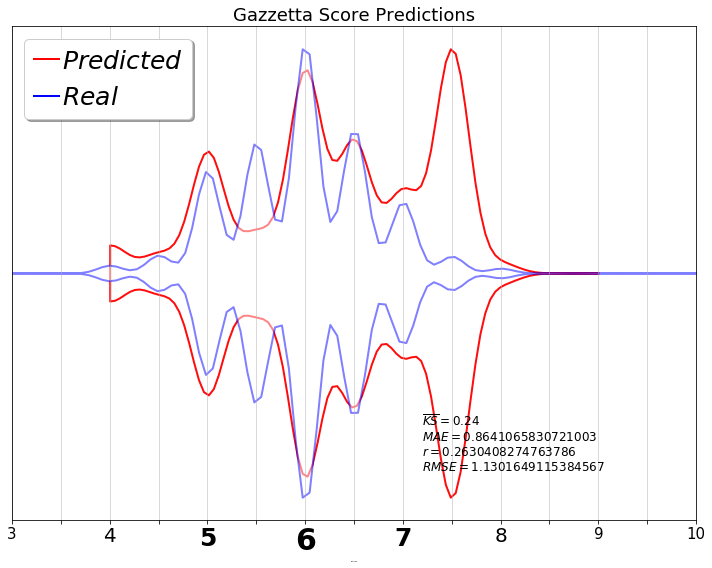

In [67]:
plotViolinPlotPreditctionDistribution(gazzettaPredict, gazzettaTrue, 'Gazzetta')

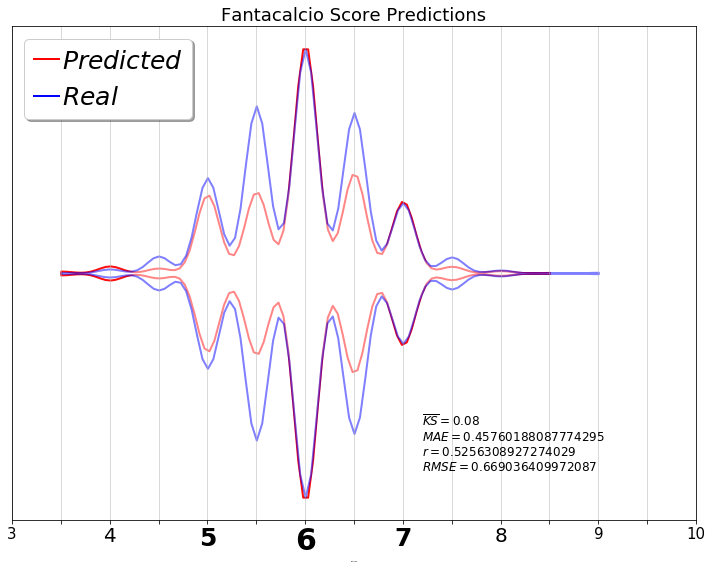

In [68]:
plotViolinPlotPreditctionDistribution(fantacalcioPredict, fantacalcioTrue, 'Fantacalcio')

[0.41115858 0.22378845 0.10318906 ... 0.41115858 0.11936654 0.07635029]


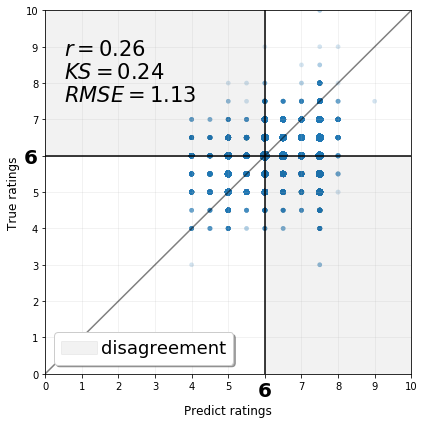

In [69]:
correlation_predicts_true(gazzettaPredict, gazzettaTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

[1.16820992 0.09339257 0.29575725 ... 0.35844328 0.16029737 0.16029737]


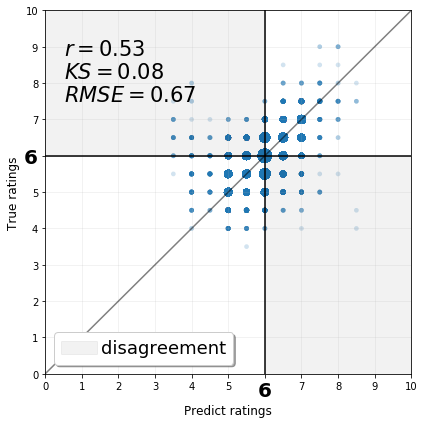

In [70]:
correlation_predicts_true(fantacalcioPredict, fantacalcioTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

# Classification using XGBOOST

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator

In [8]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        
def compute_r_score(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
        
forNeural = df.copy(deep=True)
results = {}
distributionPerNewspaper = {}
# for each newspaper
for newspaper in listMarks:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    # for each role
    for role in listRoles:
        if (newspaper != 'fantacalcio_score'):
            X = forNeural[forNeural['player_role_newspaper'] == role]
        else:
            X = forNeural[forNeural['player_role_fantacalcio'] == role]
        # extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        X['contextual_against_club_name'] = le_teams.fit_transform(X['contextual_against_club_name'])
        X['contextual_club_name'] = le_teams.transform(X['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        X['country'] = le_country.fit_transform(X['country'])

        if (newspaper == 'corriere_score'):
            X = X[X['corriere_score'] != 10]
        if (newspaper == 'corriere_score' and role == 'D'):
            X = X[X['corriere_score'] != 8]
            X = X[X['corriere_score'] != 3.5]
        if (newspaper == 'corriere_score' and role == 'P'):
            X = X[X['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 10]
        if(newspaper == 'gazzetta_score' and role == 'D'):
            subDF = subDF[subDF['gazzetta_score'] != 8]
            subDF = subDF[subDF['gazzetta_score'] != 3.5]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 9]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 8.5]

        # ectract and encode labels
        le = preprocessing.LabelEncoder()
        y = X[newspaper]
        le.fit(X[newspaper])
        y = le.transform(y)
        
        X.reset_index(drop=True, inplace=True)
        
        y = pd.DataFrame(data=y, columns=['marks'])
        values = y['marks'].value_counts().keys().tolist()
        counts = y['marks'].value_counts().tolist()
        valueToRemove = []
        for el in range(0, len(counts)):
            if(counts[el] < 2):
                valueToRemove.append(values[el])
        indextoremove = []
        if(len(valueToRemove) > 0):
            for index, el in y.iterrows():
                if(el[0] in valueToRemove):
                    indextoremove.append(index)
        
        X = X.drop(indextoremove)
        y = y.drop(indextoremove)
        
        y['marks'] = le.inverse_transform(y['marks'])
        
        # ectract and encode labels
        le = preprocessing.LabelEncoder()
        y = y['marks']
        le.fit(y)
        y = le.transform(y)
                

        for el in toRemove:
            del X[el]

        print(list(le.classes_))
        print(len(list(le.classes_)))

        # uncomment to train without contextual variables
        # for el in toRemoveWithoutContextual:
        #    del subDF[el]

        # uncomment to train without ratings variables
        # for el in toRemoveRatings:
        #    del subDF[el]

        stringMatch = newspaper + '_' + role

        results[stringMatch] = {}

        p = 0
        # remove player rank values for goalkeeper
        if (role == 'P'):
            for rat in ratings:
                del X[rat]
            p = 1
        print(stringMatch)
        
        

        robust = RobustScaler()
        robust.fit(X)
        X = robust.transform(X)
        
        #splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=17, stratify=y)
        
        '''
        #create DMatrix xgboost type
        dtrain = xgb.DMatrix(data=X_train, label=y_train)
        dtest = xgb.DMatrix(data=X_test)
        
        params = {'max_depth': 6,
                  'objective': 'multi:softmax',  # error evaluation for multiclass training
                  'num_class': len(list(le.classes_)),
                  'n_gpus': 0
                 }
        bst = xgb.train(params, dtrain)
        pred = bst.predict(dtest)
        pred = pred.astype('int')
        listr = [str(el) for el in list(le.classes_)]
        print(listr)
        print(len(listr))
        print(classification_report(y_test, pred))
        frog_cm = confusion_matrix(y_test, pred)
        plot_confusion_matrix(frog_cm, classes=listr)
        '''
        
        r = make_scorer(compute_r_score, greater_is_better=True)
        
        param_test1 = {'max_depth':range(3,10,2),
                       'min_child_weight':range(1,6,2),
                       'gamma':[i/10.0 for i in range(0,5)]
                      }
        gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
         min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
         objective= 'multi:softmax', seed=27), 
         param_grid = param_test1, scoring=r,n_jobs=-1,iid=False, cv=2)
        gsearch1.fit(X_train,y_train)
        print(gsearch1.best_params_)
        print(gsearch1.best_score_)
        
        pred = gsearch1.predict(X_test)
        pred = pred.astype('int')
        listr = [str(el) for el in list(le.classes_)]
        print(listr)
        print(len(listr))
        print(classification_report(y_test, pred))
        
        results[stringMatch]['r'] = pearsonr(le.inverse_transform(y_test), le.inverse_transform(pred))[0]
        results[stringMatch]['RSME'] = math.sqrt(mean_squared_error(le.inverse_transform(y_test), le.inverse_transform(pred)))
        results[stringMatch]['Accuracy'] = accuracy_score(y_test,pred)
        results[stringMatch]['KS'] = ks_2samp(le.inverse_transform(y_test), le.inverse_transform(pred))[0]
        results[stringMatch]['r2'] = r2_score(le.inverse_transform(y_test), le.inverse_transform(pred))

        distributionPerNewspaper[newspaper]['true'].append(le.inverse_transform(y_test))
        distributionPerNewspaper[newspaper]['pred'].append(le.inverse_transform(pred)) 

[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
12
fantacalcio_score_C
{'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 5}
0.6712907756536932
['3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0']
12
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.11      0.18         9
           2       0.11      0.02      0.04        41
           3       0.41      0.18      0.25       261
           4       0.39      0.48      0.43       570
           5       0.45      0.55      0.50       730
           6       0.44      0.39      0.42       517
           7       0.60      0.49      0.54       211
           8       0.55      0.36      0.43        45
           9       0.14      0.17      0.15         6
          10       0.00      0.00      0.00         2

    accuracy                           0.44      2393
   macro avg       0.33      0.25      0.27      23

In [15]:
res = extractResultToDataframe(results)
res = addAdditionalMetricsToDataframeResult(res)

In [16]:
res

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,fantacalcio_score_C,0.482454,0.438780,0.077309,0.450534,0.687587,0.6459,0.687587,0.6459,0.041687
1,fantacalcio_score_A,0.490661,0.468774,0.060139,0.620016,0.805624,0.6459,0.805624,0.6459,0.159724
2,fantacalcio_score_D,0.519112,0.409716,0.062328,0.387717,0.656368,0.6459,0.656368,0.6459,0.010468
3,fantacalcio_score_P,0.535180,0.450787,0.092520,0.136022,0.434021,0.6459,0.434021,0.6459,-0.211879


In [17]:
res.to_csv(os.path.join(DATA_PATH, 'XGB_BOOST_performances_all.csv'), index = False)

In [17]:
true, predict = extract_true_and_predicted(distributionPerNewspaper)

In [14]:
gazzettaTrue = true['gazzetta_score']
gazzettaPredict = predict['gazzetta_score']
fantacalcioTrue = true['fantacalcio_score']
fantacalcioPredict = predict['fantacalcio_score']

In [18]:
np.save(os.path.join(DATA_PATH, 'XGB_BOOST_true_predictions_all.npy'), true) 

In [19]:
np.save(os.path.join(DATA_PATH, 'XGB_BOOST_predictions_all.npy'), predict) 

In [20]:
# Load
true1 = np.load(os.path.join(DATA_PATH, 'XGB_BOOST_true_predictions_all.npy'),allow_pickle='TRUE').item()
predict1 = np.load(os.path.join(DATA_PATH, 'XGB_BOOST_predictions_all.npy'),allow_pickle='TRUE').item()

In [21]:
gazzettaTrue = true1['gazzetta_score']
gazzettaPredict = predict1['gazzetta_score']
fantacalcioTrue = true1['fantacalcio_score']
fantacalcioPredict = predict1['fantacalcio_score']

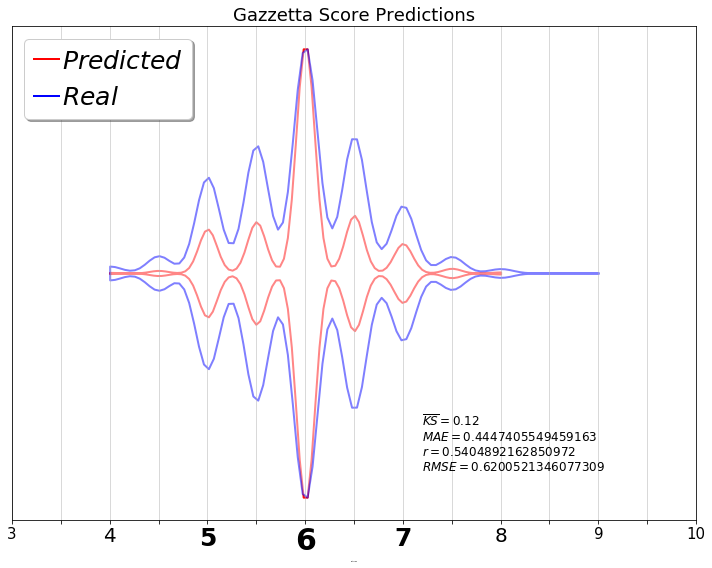

In [22]:
plotViolinPlotPreditctionDistribution(gazzettaPredict, gazzettaTrue, 'Gazzetta')

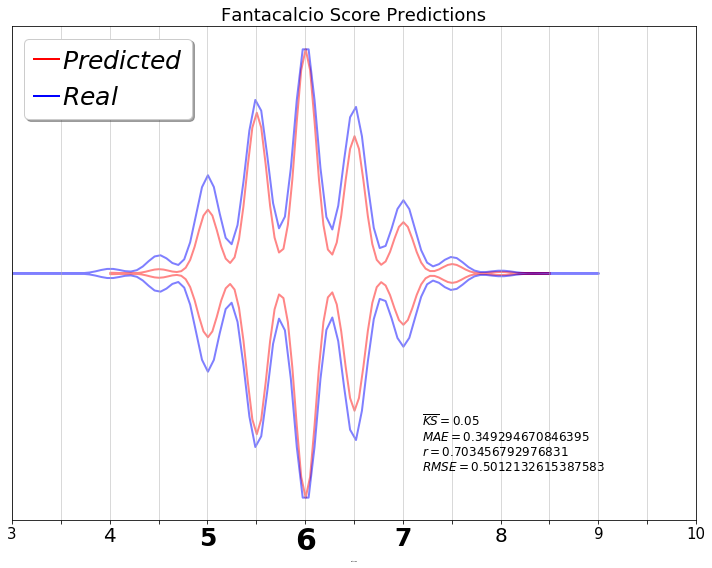

In [23]:
plotViolinPlotPreditctionDistribution(fantacalcioPredict, fantacalcioTrue, 'Fantacalcio')

[2.00638805 0.18710358 2.00638805 ... 2.00638805 0.92961959 0.99328283]


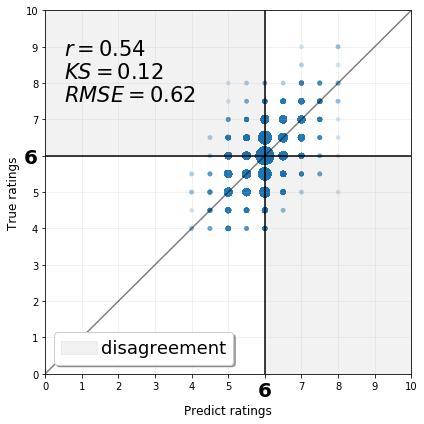

In [29]:
concordance = None
correlation_predicts_true(gazzettaPredict, gazzettaTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

[1.581018   1.581018   0.17081377 ... 1.581018   0.78201083 0.76594567]


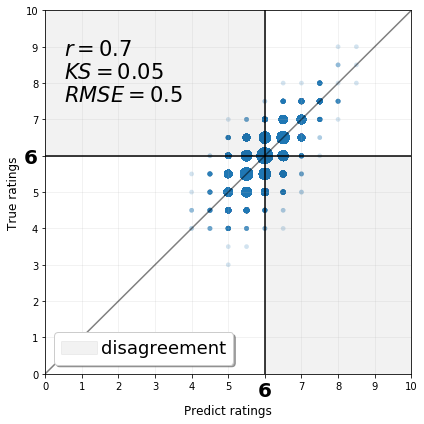

In [30]:
correlation_predicts_true(fantacalcioPredict, fantacalcioTrue, 'Predict', 'True', plot_type='scatter', concordance=concordance)

# Decision tree regressor

In [19]:
def compute_r_score(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

decisionTreeRegre = df.copy(deep=True)
results = {}
distributionPerNewspaper = {}
# for each newspaper
for newspaper in onlyFaGazz:
    distributionPerNewspaper[newspaper] = {}
    distributionPerNewspaper[newspaper]['true'] = []
    distributionPerNewspaper[newspaper]['pred'] = []
    # for each role
    for role in listRoles:
        if (newspaper != 'fantacalcio_score'):
            X = decisionTreeRegre[decisionTreeRegre['player_role_newspaper'] == role]
        else:
            X = decisionTreeRegre[decisionTreeRegre['player_role_fantacalcio'] == role]
        # extract and transfrom categorical values
        le_teams = preprocessing.LabelEncoder()
        X['contextual_against_club_name'] = le_teams.fit_transform(X['contextual_against_club_name'])
        X['contextual_club_name'] = le_teams.transform(X['contextual_club_name'])
        le_country = preprocessing.LabelEncoder()
        X['country'] = le_country.fit_transform(X['country'])

        if (newspaper == 'corriere_score'):
            X = X[X['corriere_score'] != 10]
        if (newspaper == 'corriere_score' and role == 'D'):
            X = X[X['corriere_score'] != 8]
            X = X[X['corriere_score'] != 3.5]
        if (newspaper == 'corriere_score' and role == 'P'):
            X = X[X['corriere_score'] != 9]
            
        #UNCOMMENT IF YOU USE ONLY A SINGLE SEASON
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 10]
        if(newspaper == 'gazzetta_score' and role == 'D'):
            subDF = subDF[subDF['gazzetta_score'] != 8]
            subDF = subDF[subDF['gazzetta_score'] != 3.5]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 9]
        if(newspaper == 'gazzetta_score'):
            subDF = subDF[subDF['gazzetta_score'] != 8.5]

        
        #remove those marks that are too few in order to make a regression
        y = X[newspaper]                

        for el in toRemove:
            del X[el]

        stringMatch = newspaper + '_' + role

        results[stringMatch] = {}

        p = 0
        # remove player rank values for goalkeeper
        if (role == 'P'):
            for rat in ratings:
                del X[rat]
            p = 1
        print(stringMatch)
        
        #apply robust scaler to data
        robust = RobustScaler()
        robust.fit(X)
        X = robust.transform(X)
        
        print(len(y))
        
        #splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=17)
        
        param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

        #create a regressor object 
        regressor = DecisionTreeRegressor()
        
        r = make_scorer(compute_r_score, greater_is_better=True)
        
        clf = GridSearchCV(regressor, 
                           param_grid,
                           scoring=r,
                           cv=5 , n_jobs=1, verbose=1)
        %time _ = clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_test)
        y_true = y_test
        
        dat = pd.DataFrame()
        dat['y'] = y_pred
        y_pred = dat.y.mul(2).round().div(2)
        
        joined_list = [*y_pred, *y_true]
        
        le = preprocessing.LabelEncoder()
        le.fit(joined_list)
        
        results[stringMatch]['r'] = pearsonr(y_true, y_pred)[0]
        results[stringMatch]['RSME'] = math.sqrt(mean_squared_error(y_true, y_pred))
        results[stringMatch]['Accuracy'] = accuracy_score(le.transform(y_true), le.transform(y_pred))
        results[stringMatch]['KS'] = ks_2samp(y_true, y_pred)[0]
        results[stringMatch]['r2'] = r2_score(y_true, y_pred)
        

        distributionPerNewspaper[newspaper]['true'].append(y_test)
        distributionPerNewspaper[newspaper]['pred'].append(y_pred) 

fantacalcio_score_C
9571
Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   33.6s finished


Wall time: 33.8 s
fantacalcio_score_A
5185
Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   16.9s finished


Wall time: 17.1 s
fantacalcio_score_D
8727
Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   29.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 29.6 s
fantacalcio_score_P
2032
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Wall time: 4.37 s


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    4.3s finished


In [20]:
res = extractResultToDataframe(results)
res = addAdditionalMetricsToDataframeResult(res)

In [21]:
res

,Dataset,RSME,Accuracy,KS,r2,r,mean_r_newspaper,mean_r_role,mean_r_same_newspaper,difference_w_r_t_mean
0,fantacalcio_score_C,0.489441,0.436690,0.134141,0.437168,0.671436,0.637173,0.671436,0.637173,0.034263
1,fantacalcio_score_A,0.467733,0.447186,0.195837,0.656996,0.814850,0.637173,0.814850,0.637173,0.177677
2,fantacalcio_score_D,0.523179,0.393676,0.040788,0.382173,0.654494,0.637173,0.654494,0.637173,0.017321
3,fantacalcio_score_P,0.543845,0.427165,0.129921,0.138937,0.407911,0.637173,0.407911,0.637173,-0.229262


In [22]:
true, predict = extract_true_and_predicted(distributionPerNewspaper)

In [25]:
fantagazzTrue = true['fantacalcio_score']
fantagazzPred = predict['fantacalcio_score']

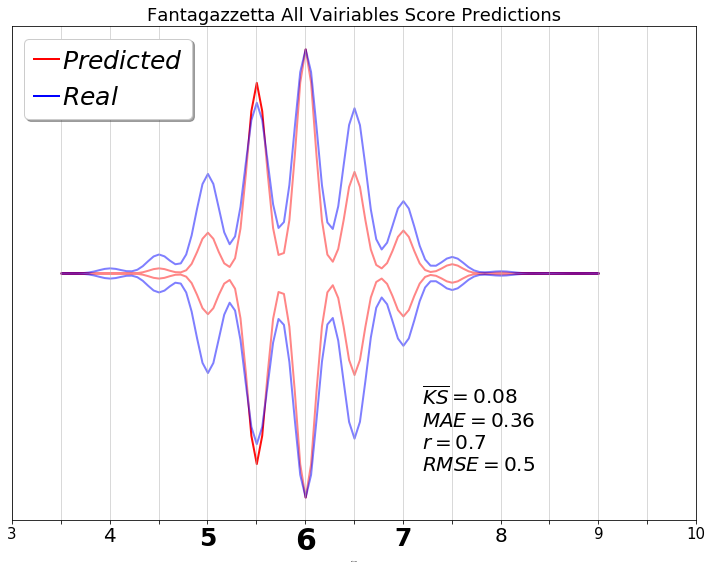

In [26]:
plotViolinPlotPreditctionDistribution(fantagazzPred, fantagazzTrue, 'Fantagazzetta All Vairiables')